<a href="https://colab.research.google.com/github/momo54/count-distinct-watdiv/blob/main/Count_Distinct_Watdiv_%26_WDBench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See Table of content to Jump on Figures

## Watdiv Loading

In [ ]:
! wget -O gt.csv https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/GT.csv
! wget -O crawd.csv https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/crawd.csv
! wget -O chao.csv https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/chao.csv

! wget -O gt.csv https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/gt-original.csv
! wget -O crawd.csv https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/crawd-original.csv
! wget -O chao.csv https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/chao-original.csv


--2024-07-25 13:26:20--  https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/GT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781 (2.7K) [text/plain]
Saving to: ‘gt.csv’

gt.csv              100%[===================>]   2.72K  --.-KB/s    in 0s      

2024-07-25 13:26:20 (31.1 MB/s) - ‘gt.csv’ saved [2781/2781]

--2024-07-25 13:26:20--  https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/crawd.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113255 (111K) [text/plain]
Saving 

In [ ]:
!apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
sns.set(rc={'text.usetex': True,'axes.facecolor': 'white','figure.facecolor': 'white'})
# Format y-axis ticks as percentages
def format_percent_y(y, pos):
    return str(int(y)) + r'\%'

dtype_gt = {
    'query': str,
    'nbtp': int,
    'count': int,
    'countime': float,
    'var': str,
    'dv': int,
    'df': int,
    'timedv': float,
    'timedf': float
}

column_names_crawd = ['query', 'Config', 'Run',
                      'WJ_SampleSize', 'CRAWD_SampleSize', 'fu_SampleSize', 'fu_success', 'fu_fail',
                      'N','Nb_Total_Scans', 'Execution_time', 'cd']
dtype_crawd = {
    'query': str,
    'Config': int,
    'Run': int,
    'WJ_SampleSize': float,
    'CRAWD_SampleSize': float,
    'fu_SampleSize': float,
    'fu_success': float,
    'fu_fail': float,
    'N': float,
    'Nb_Total_Scans': float,
    'Execution_time': float,
    'cd': float
}

column_names_chao = ['query', 'Config', 'Run', 'N_SampleSize', 'CHAOLEE_SampleSize', 'Nb_Total_Scans', 'Execution_time', 'cd']
dtype_chao = {
    'query': str,
    'Config': int,
    'Run': int,
    'N_SampleSize': float,
    'CHAOLEE_SampleSize': float,
    'Nb_Total_Scans': float,
    'Execution_time': float,
    'cd': float
}


# Lire les fichiers CSV
gt = pd.read_csv('gt.csv', delimiter=',', dtype=dtype_gt)
crawd = pd.read_csv('crawd.csv', delimiter=',', dtype=dtype_crawd)
chao= pd.read_csv('chao.csv', delimiter=',', dtype=dtype_chao)

# dv : distinct value
# df : distinct frequency
# count : count *
# var : projected count distinct value.

## bad headers in CSV files :(
gt = gt.rename(columns={' nbtp': 'nbtp'})
crawd = crawd.rename(columns={'query_name': 'query'})
chao = chao.rename(columns={'query_name': 'query'})



print("GT")
print(gt.head(2))

print("CRAWD")
print(crawd.head(2))

print("CHAO")
print(chao.head(2))

GT
   query  nbtp     count  countime var       dv   df     timedv    timedf
0  SPO_o     1  10916457  0.102274   o  1005832  641  19.308260  8.542079
1  SPO_s     1  10916457  0.102274   s   521585  308  53.306931  8.171334
CRAWD
           query  Config  Run  WJ_SampleSize  CRAWD_SampleSize  \
0  query_6731_v1       1    1         2618.0             386.0   
1  query_6731_v1       1    2         2457.0             426.0   

   ∑Fµ_SampleSize  ∑Fµ_success  ∑Fµ_fail           N̂  Nb_Total_Scans  \
0          1124.0        669.0     455.0  4206.320856         10000.0   
1          1217.0        731.0     486.0  4789.264957         10000.0   

   Execution_time           cd  
0          1829.0  2170.267380  
1           829.0  2548.290598  
CHAO
           query  Config  Run  BigN_SampleSize  CHAOLEE_SampleSize  \
0  query_6731_v1       1    1           2689.0               362.0   
1  query_6731_v1       1    2           2505.0               402.0   

   Nb_Total_Scans  Execution_time  

In [ ]:
crawd.shape

(2610, 12)

In [ ]:
SPO_queries = ['SPO_o','SPO_s','SPO_p']
crawd = crawd[~crawd['query'].isin(SPO_queries)]
chao = chao[~chao['query'].isin(SPO_queries)]
gt = gt[~gt['query'].isin(SPO_queries)]
crawd.shape

(2475, 12)

In [ ]:
# prompt: combien de query distincte ?

print("Nombre de requêtes distinctes dans GT :", gt['query'].nunique())
print("Nombre de requêtes distinctes dans CRAWD :", crawd['query'].nunique())
print("Nombre de requêtes distinctes dans CHAO :", chao['query'].nunique())


Nombre de requêtes distinctes dans GT : 55
Nombre de requêtes distinctes dans CRAWD : 55
Nombre de requêtes distinctes dans CHAO : 55


In [ ]:
# Calculer l'erreur absolue pour chaque estimation en utilisant la colonne 'cd'
def calculate_errors(df, gt_df):
    df = df.merge(gt_df, on='query', suffixes=('', '_gt'))
    df['error'] = abs(df['cd'] - df['dv'])
    df['relative_error'] = (abs(df['cd'] - df['dv']) / df['dv'])*100
    return df

# Calculer l'erreur absolue pour chaque estimation
crawd_watdiv = calculate_errors(crawd, gt)
chao_watdiv = calculate_errors(chao, gt)

print(crawd_watdiv.head(2)[['query','Config','error','relative_error']])
print(chao_watdiv.head(2)[['query','Config', 'error','relative_error']])


           query  Config        error  relative_error
0  query_6731_v1       1  1109.732620       33.833312
1  query_6731_v1       1   731.709402       22.308213
           query  Config        error  relative_error
0  query_6731_v1       1  1552.056749       47.318803
1  query_6731_v1       1  1193.998161       36.402383


## WDBench Loading

In [ ]:
! wget -N https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/CHAOLEE_all_results.csv
! wget -N https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/CRAWD_all_results.csv
! wget -N https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/aggregated_CHAOLEE_all_results.csv
! wget -N https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/aggregated_CRAWD_all_results.csv

--2024-07-25 13:26:34--  https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/CHAOLEE_all_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94172 (92K) [text/plain]
Saving to: ‘CHAOLEE_all_results.csv’

CHAOLEE_all_results 100%[===================>]  91.96K  --.-KB/s    in 0.02s   

Last-modified header missing -- time-stamps turned off.
2024-07-25 13:26:34 (4.76 MB/s) - ‘CHAOLEE_all_results.csv’ saved [94172/94172]

--2024-07-25 13:26:34--  https://raw.githubusercontent.com/momo54/count-distinct-watdiv/main/output/CRAWD_all_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [ ]:
df_crawd_all = pd.read_csv('CRAWD_all_results.csv')
df_crawd_aggregate = pd.read_csv("aggregated_CRAWD_all_results.csv")
df_chaolee_all = pd.read_csv("CHAOLEE_all_results.csv")
df_chaolee_aggregate = pd.read_csv("aggregated_CHAOLEE_all_results.csv")


In [ ]:
df_crawd_all.columns

Index(['query_name', 'Config', 'Run', 'WJ_SampleSize', 'CRAWD_SampleSize',
       '∑Fµ_SampleSize', '∑Fµ_success', '∑Fµ_fail', 'N̂', 'Nb_Total_Scans',
       'Execution_time', 'cd'],
      dtype='object')

In [ ]:
df_crawd_merge = df_crawd_all.merge(df_crawd_aggregate[["query_name","CD_GT","CA","triple_count"]], on="query_name", how="left")
df_chaolee_merge = df_chaolee_all.merge(df_chaolee_aggregate[["query_name","CD_GT","CA","triple_count"]], on="query_name", how="left")


In [ ]:
df_crawd_merge.shape

(1920, 15)

In [ ]:
SPO_queries_wdbench = ['query_SPO_o','query_SPO_s','query_SPO_p']
df_crawd_merge = df_crawd_merge[~df_crawd_merge['query_name'].isin(SPO_queries_wdbench)]
df_chaolee_merge = df_chaolee_merge[~df_chaolee_merge['query_name'].isin(SPO_queries_wdbench)]
df_crawd_merge.shape


(1800, 15)

In [ ]:
df_crawd_merge['triple_count'] = df_crawd_merge['triple_count'].astype(int)
df_chaolee_merge['triple_count'] = df_chaolee_merge['triple_count'].astype(int)

In [ ]:
# Calculer l'erreur absolue pour chaque estimation en utilisant la colonne 'cd'
def calculate_errors(df):
    df['error'] = abs(df['cd'] - df['CD_GT'])
    df['relative_error'] = (abs(df['cd'] - df['CD_GT']) / df['CD_GT'])*100
    return df

# Calculer l'erreur absolue pour chaque estimation
crawd_wdbench = calculate_errors(df_crawd_merge)
chao_wdbench = calculate_errors(df_chaolee_merge)

print(crawd_wdbench.head(2)[['query_name','Config','error','relative_error']])
print(chao_wdbench.head(2)[['query_name','Config', 'error','relative_error']])



  query_name  Config    error  relative_error
0  query_137       1  51061.0       22.853038
1  query_137       1  58148.0       26.024920
  query_name  Config    error  relative_error
0  query_137       1  44550.0       19.938952
1  query_137       1  88311.0       39.524777


## checking, both datasets same structure

In [ ]:

crawd_wdbench = crawd_wdbench.rename(columns={'query_name': 'query', 'CD_GT': 'dv', 'CA': 'count','triple_count':'nbtp'})
chao_wdbench = chao_wdbench.rename(columns={'query_name': 'query', 'CD_GT': 'dv', 'CA': 'count','triple_count':'nbtp'})
crawd_wdbench['nbtp'] = crawd_wdbench['nbtp'].astype(int)
print(crawd_wdbench.columns)
print(crawd_watdiv.columns)
print("---------------------------------------------------")

print(chao_wdbench.columns)
print(chao_watdiv.columns)

# should be ok for the following :-D


Index(['query', 'Config', 'Run', 'WJ_SampleSize', 'CRAWD_SampleSize',
       '∑Fµ_SampleSize', '∑Fµ_success', '∑Fµ_fail', 'N̂', 'Nb_Total_Scans',
       'Execution_time', 'cd', 'dv', 'count', 'nbtp', 'error',
       'relative_error'],
      dtype='object')
Index(['query', 'Config', 'Run', 'WJ_SampleSize', 'CRAWD_SampleSize',
       '∑Fµ_SampleSize', '∑Fµ_success', '∑Fµ_fail', 'N̂', 'Nb_Total_Scans',
       'Execution_time', 'cd', 'nbtp', 'count', 'countime', 'var', 'dv', 'df',
       'timedv', 'timedf', 'error', 'relative_error'],
      dtype='object')
---------------------------------------------------
Index(['query', 'Config', 'Run', 'BigN_SampleSize', 'CHAOLEE_SampleSize',
       'Nb_Total_Scans', 'Execution_time', 'cd', 'dv', 'count', 'nbtp',
       'error', 'relative_error'],
      dtype='object')
Index(['query', 'Config', 'Run', 'BigN_SampleSize', 'CHAOLEE_SampleSize',
       'Nb_Total_Scans', 'Execution_time', 'cd', 'nbtp', 'count', 'countime',
       'var', 'dv', 'df', 'timedv'

In [ ]:
crawd_watdiv.to_csv('/content/crawd_watdiv.csv', index=False)


# From here, everithing should work whatever watdiv or WdBench

In [ ]:
def summarize_errors(df):
    # Sélectionner uniquement les colonnes nécessaires pour éviter les conflits
    df = df[['Config', 'Run', 'error','relative_error']]

    df_summary = df.groupby(['Config', 'Run']).mean().reset_index()
    df_summary = df_summary.groupby('Config').mean().reset_index()
    return df_summary

# Calculer le résumé des erreurs pour crawd et chao
crawd_summary_watdiv = summarize_errors(crawd_watdiv)
chao_summary_watdiv = summarize_errors(chao_watdiv)

crawd_summary_wdbench = summarize_errors(crawd_wdbench)
chao_summary_wdbench = summarize_errors(chao_wdbench)


print(crawd_summary_watdiv.head(2))
print(chao_summary_watdiv.head(2))

print(crawd_summary_wdbench.head(2))
print(chao_summary_wdbench.head(2))


   Config  Run        error  relative_error
0       1  3.0  8130.011192       55.743331
1       2  3.0  8389.673132       55.095080
   Config  Run         error  relative_error
0       1  3.0  18814.444089       61.527927
1       2  3.0  17134.593908       58.789988
   Config  Run        error  relative_error
0       1  3.0  2441788.645       17.456033
1       2  3.0  2019474.000       15.562620
   Config  Run        error  relative_error
0       1  3.0  3286755.955       50.272222
1       2  3.0  3132377.250       48.930985


In [ ]:
# prompt: je veux écrire crawd_summary_watdiv dans un fichier csv

crawd_summary_watdiv.to_csv('/content/crawd_summary_watdiv.csv', index=False)


In [ ]:

def examine(query_name,config,crawd,chao):
  # prompt: Je veux voir les données de C6_role1_o en projettant sur cd
  # Filtrer les données pour la requête C6_role1_o
  crawd_qc = crawd[(crawd['Config'] == config) & (crawd['query'] == query_name)]
  chao_qc = chao[(chao['Config'] == config) & (chao['query'] == query_name)]



  # Afficher les données projetées sur 'cd'
  print(f"CRAWD {query_name} (projected on 'cd'):")
  print(crawd_qc[['Run', 'cd','dv','error','relative_error','CRAWD_SampleSize','nbtp','count']])

  print(f"\nCHAO {query_name} (projected on 'cd'):")
  print(chao_qc[['Run', 'cd','dv','error','relative_error','CHAOLEE_SampleSize','nbtp','count']])


#examine('C6_role1_o',9)
#examine('Q-10025_v2',9)
#examine('Q-10025_v2',7)
examine('c6_pc3_o',9,crawd_watdiv,chao_watdiv)
examine('query_137',9,crawd_wdbench,chao_wdbench)

CRAWD c6_pc3_o (projected on 'cd'):
Empty DataFrame
Columns: [Run, cd, dv, error, relative_error, CRAWD_SampleSize, nbtp, count]
Index: []

CHAO c6_pc3_o (projected on 'cd'):
Empty DataFrame
Columns: [Run, cd, dv, error, relative_error, CHAOLEE_SampleSize, nbtp, count]
Index: []
CRAWD query_137 (projected on 'cd'):
      Run      cd        dv    error  relative_error  CRAWD_SampleSize  nbtp  \
1200    1  224731  223432.0   1299.0        0.581385            2273.0     4   
1201    2  223640  223432.0    208.0        0.093093            2268.0     4   
1202    3  213926  223432.0   9506.0        4.254538            2273.0     4   
1203    4  217036  223432.0   6396.0        2.862616            2272.0     4   
1204    5  212211  223432.0  11221.0        5.022110            2266.0     4   

          count  
1200  9468982.0  
1201  9468982.0  
1202  9468982.0  
1203  9468982.0  
1204  9468982.0  

CHAO query_137 (projected on 'cd'):
      Run      cd        dv    error  relative_error  CHA

# View evolution of Relative error and Distinct Value through Config

1.   Not in the paper, but interesting...



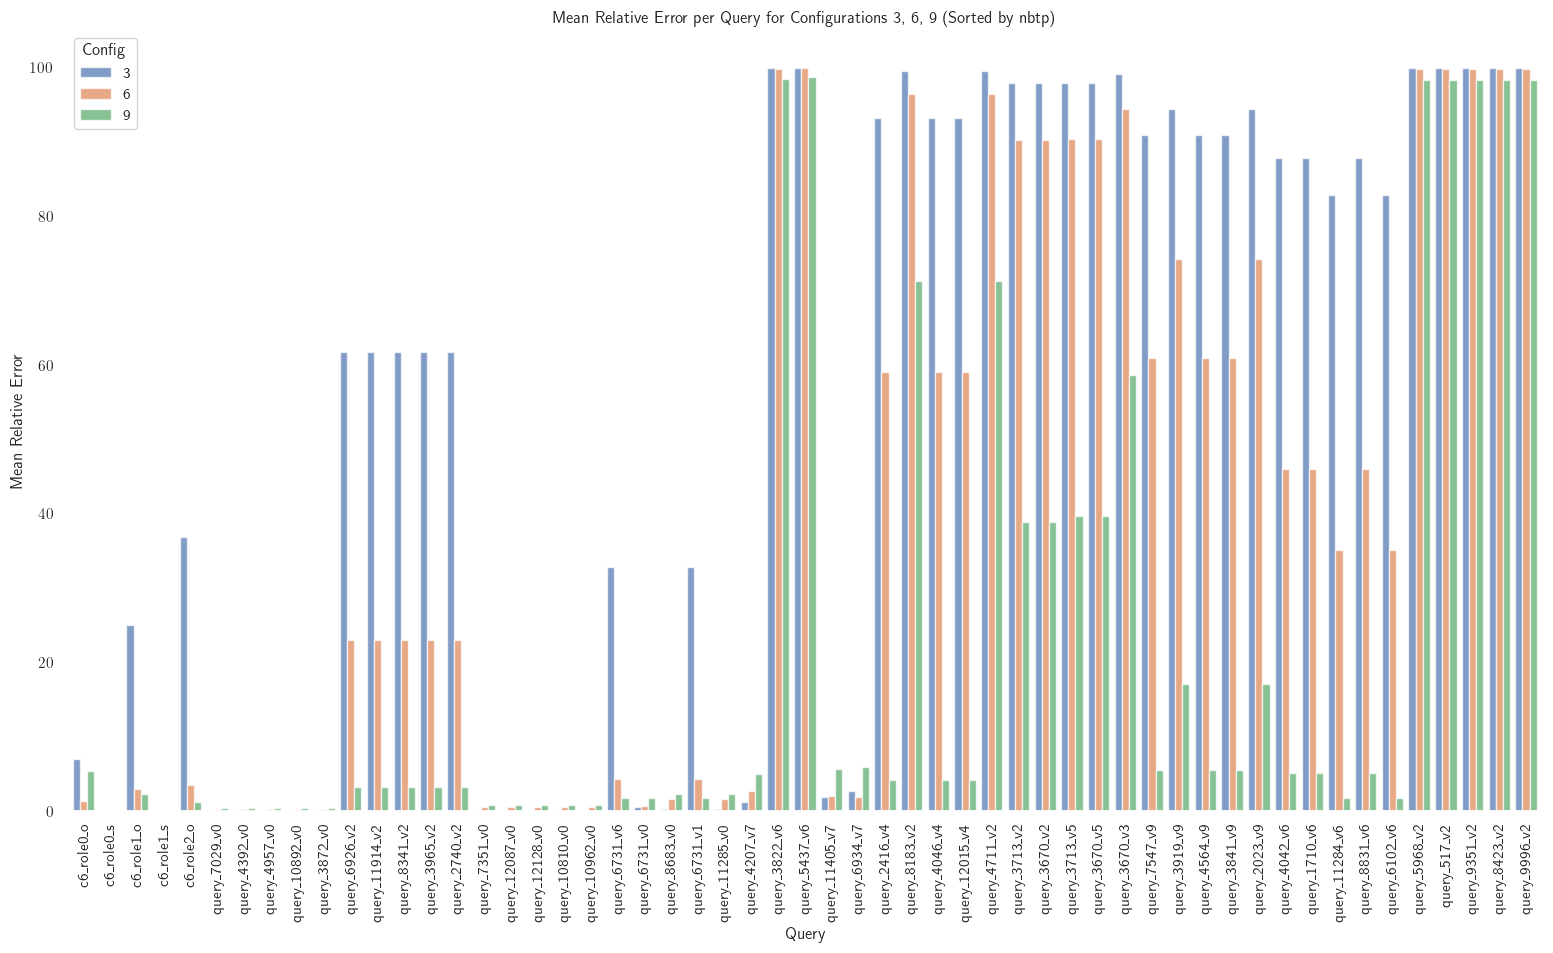

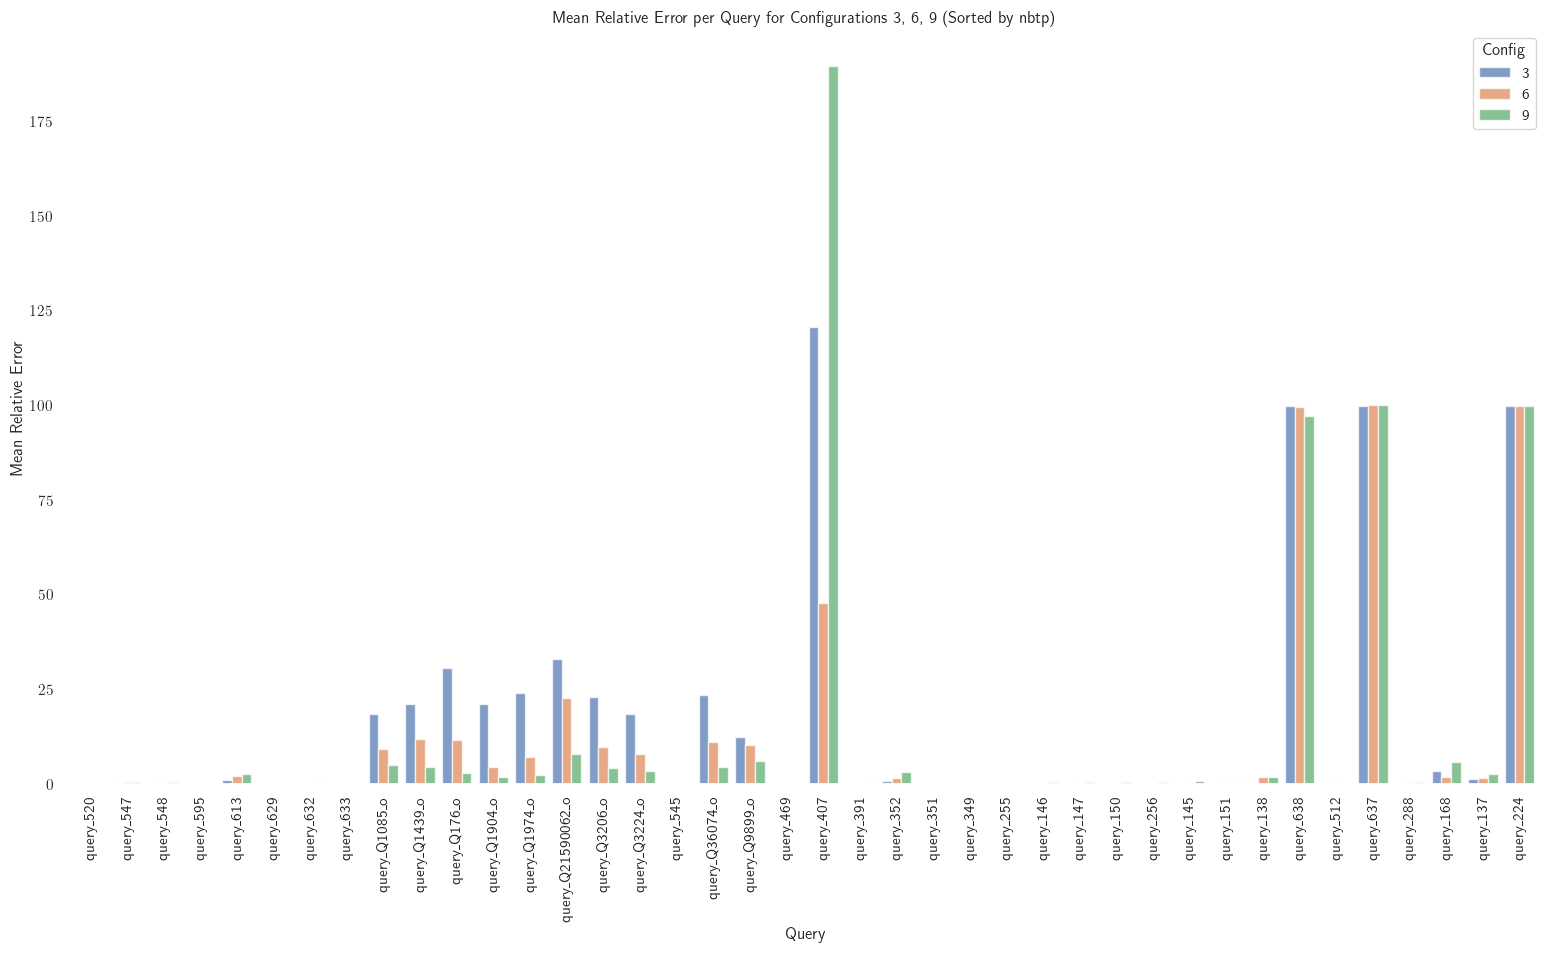

In [ ]:
#{
#  "config1": {"limit": 10000, "sl": 1},
#  "config2": {"limit": 100000, "sl": 1},
#  "config3": {"limit": 1000000, "sl": 1},
#  "config4": {"limit": 10000, "sl": 10},
#  "config5": {"limit": 100000, "sl": 10},
#  "config6": {"limit": 1000000, "sl": 10},
#  "config7": {"limit": 10000, "sl": 100},
#  "config8": {"limit": 100000, "sl": 100},
#  "config9": {"limit": 1000000, "sl": 100}
#}


import pandas as pd
import matplotlib.pyplot as plt

def plot_mean_relative_error_accross_config(data, configs, title):
    # Filter data for the given configurations
    filtered_data = data[data['Config'].isin(configs)]

    # Calculate the mean relative error per query for each configuration
    pivoted_data = filtered_data.pivot_table(values='relative_error', index='query', columns='Config', aggfunc='mean')

    # Merge the nbtp values with the pivoted data
    merged_data = pivoted_data.merge(data[['query', 'nbtp']].drop_duplicates(), on='query')

    # Sort the data by nbtp
    sorted_data = merged_data.sort_values(by='nbtp').set_index('query')

    # Plot the sorted bar chart with bars side by side for each query with some space between the groups
    ax = sorted_data.drop(columns='nbtp').plot(kind='bar', figsize=(16, 10), alpha=0.7, width=0.8)

    # Adjust the spacing between groups
#    for bar in ax.containers:
#        ax.bar_label(bar, label_type='edge', padding=3,rotation=90)

    ax.set_xlabel('Query')
    ax.set_ylabel('Mean Relative Error')
    ax.set_title(f'Mean Relative Error per Query for Configurations {", ".join(map(str, configs))} (Sorted by nbtp)')
    ax.legend(title='Config')
    ax.grid(True)

    # Adding some space between groups
    plt.xticks(rotation=90)
    plt.tight_layout(pad=2.0)
    plt.show()

# Load the data

# Call the function with the data and desired configurations
plot_mean_relative_error_accross_config(crawd_watdiv, [3, 6, 9],'CRAWD evolution of error accross config 3,6,9 for WatDiv')
plot_mean_relative_error_accross_config(crawd_wdbench, [3, 6, 9],'CRAWD evolution of error accross config 3,6,9 for WdBench')


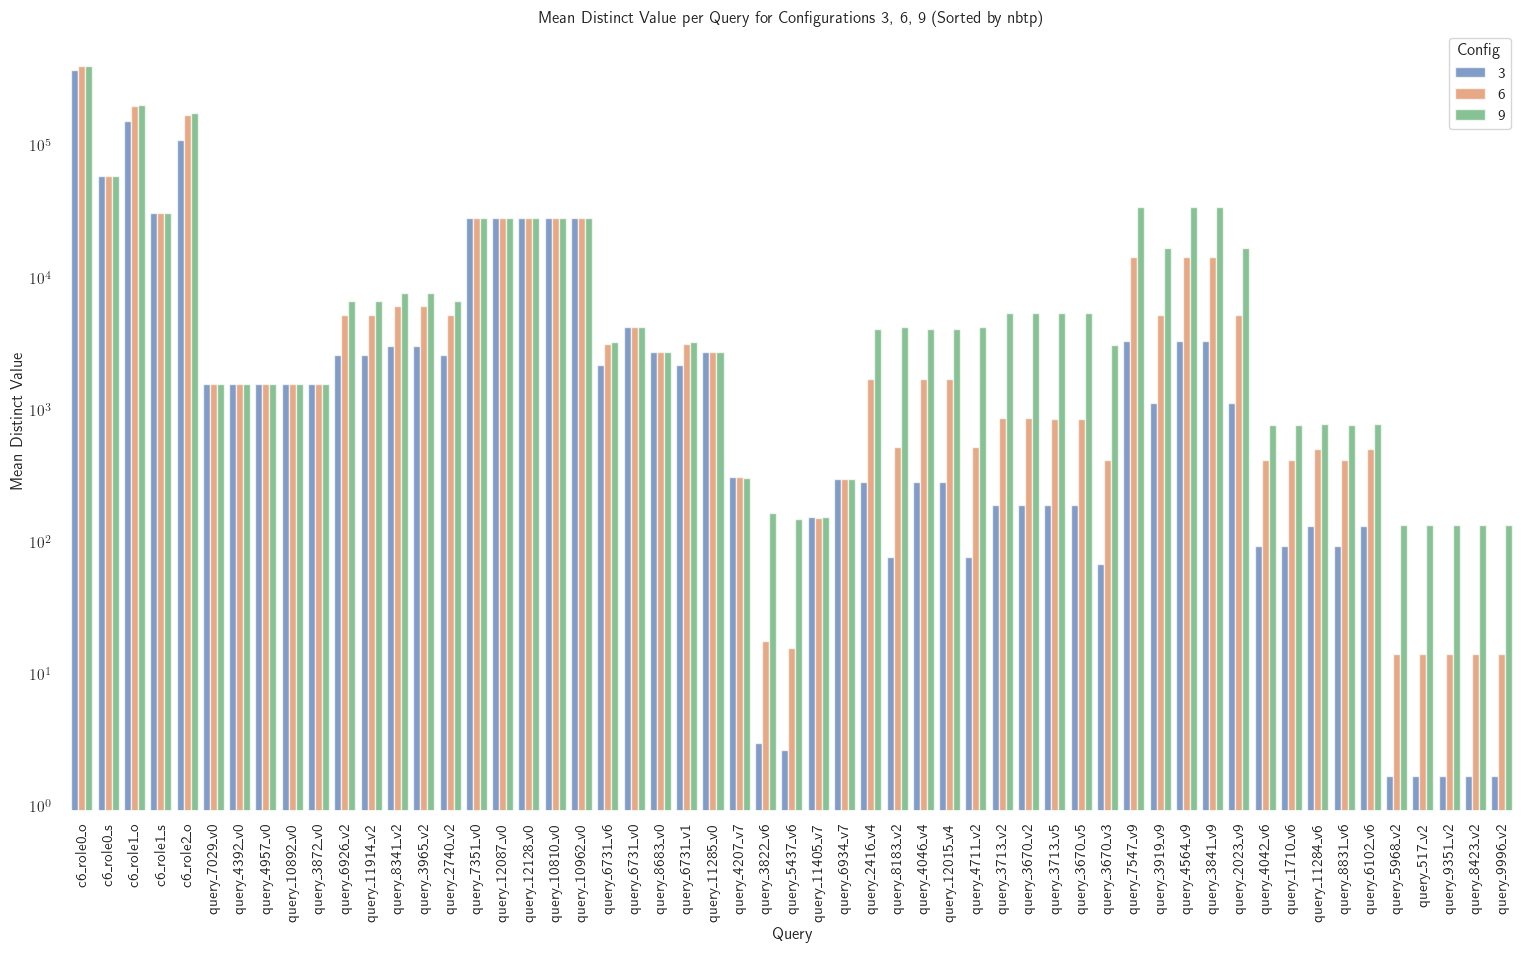

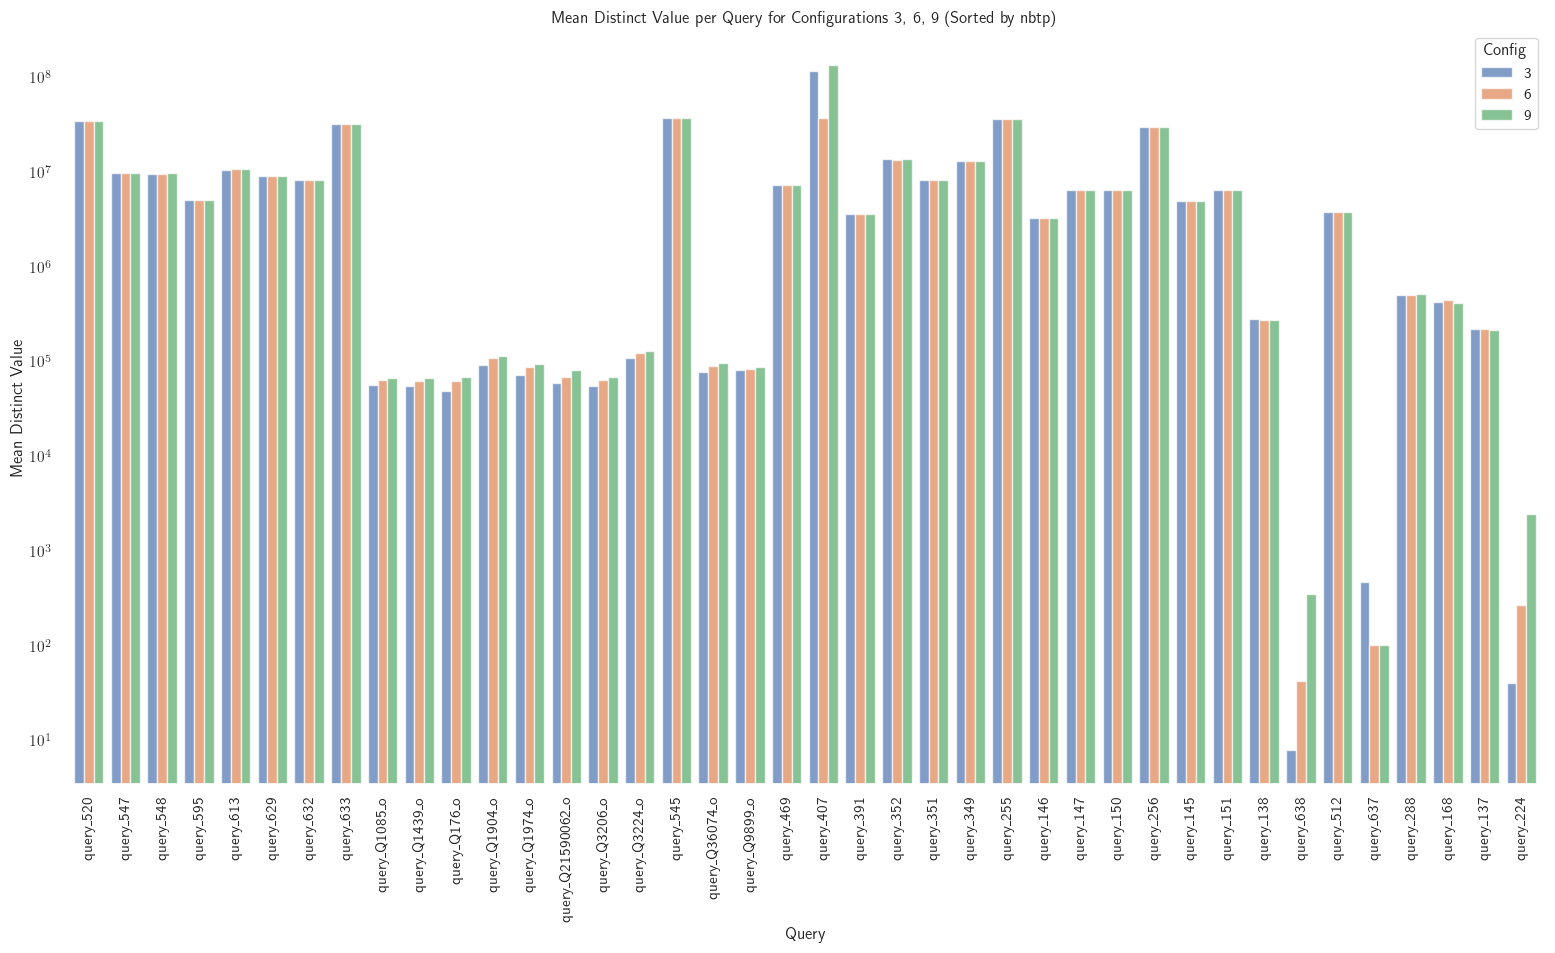

In [ ]:
def plot_dv_accross_config(data, configs, title):
    # Filter data for the given configurations
    filtered_data = data[data['Config'].isin(configs)]

    # Calculate the mean relative error per query for each configuration
    pivoted_data = filtered_data.pivot_table(values='cd', index='query', columns='Config', aggfunc='mean')

    # Merge the nbtp values with the pivoted data
    merged_data = pivoted_data.merge(data[['query', 'nbtp']].drop_duplicates(), on='query')

    # Sort the data by nbtp
    sorted_data = merged_data.sort_values(by='nbtp').set_index('query')

    # Plot the sorted bar chart with bars side by side for each query with some space between the groups
    ax = sorted_data.drop(columns='nbtp').plot(kind='bar', figsize=(16, 10), alpha=0.7, width=0.8)

    # Adjust the spacing between groups
#    for bar in ax.containers:
#        ax.bar_label(bar, label_type='edge', padding=3,rotation=90)

    ax.set_xlabel('Query')
    ax.set_ylabel('Mean Distinct Value')
    ax.set_title(f'Mean Distinct Value per Query for Configurations {", ".join(map(str, configs))} (Sorted by nbtp)')
    ax.legend(title='Config')
    ax.grid(True)

    # Adding some space between groups
    plt.xticks(rotation=90)
    plt.tight_layout(pad=2.0)
    plt.yscale('log')
    plt.show()

# Load the data

# Call the function with the data and desired configurations
plot_dv_accross_config(crawd_watdiv, [3, 6, 9],'evolution of distinct values accross config 3,6,9 for WatDiv')
plot_dv_accross_config(crawd_wdbench, [3, 6, 9],'evolution of distinct values accross config 3,6,9 for WdBench')

# Execution Time
* carefull, CRAWD can be parallilized, but not Chao
* can be unfair...
* Be sure CRAWD and Chao_lee run with 1 thread...

In [ ]:
# prepare ET data...

def summarize_et_per_config(df):
    # Sélectionner uniquement les colonnes nécessaires pour éviter les conflits
    df = df[['Config', 'Run', 'error','Execution_time']]

     # Calculer la moyenne et l'écart type des temps d'exécution
    df_summary = df.groupby(['Config', 'Run'])['Execution_time'].agg(['mean', 'std']).reset_index()

    # Calculer la moyenne des moyennes et des écarts types pour chaque configuration
    df_summary = df_summary.groupby('Config')[['mean', 'std']].mean().reset_index()

    return df_summary


# Calculer le résumé des erreurs pour crawd et chao
crawd_et_watdiv = summarize_et_per_config(crawd_watdiv)
chao_et_watdiv = summarize_et_per_config(chao_watdiv)

crawd_et_wdbench = summarize_et_per_config(crawd_wdbench)
chao_et_wdbench = summarize_et_per_config(chao_wdbench)


print(crawd_et_watdiv)
print(chao_et_watdiv)

print(crawd_et_wdbench)
print(chao_et_wdbench)

   Config          mean           std
0       1    759.094545    365.347114
1       2   4700.450909   2678.633265
2       3  41938.509091  25352.922601
3       4    459.683636     88.370230
4       5   2381.727273    437.716716
5       6  19773.687273   3978.165756
6       7    308.676364     40.123181
7       8   1599.618182    230.955507
8       9  12316.738182   2264.912903
   Config          mean           std
0       1    817.101818    433.568502
1       2   4112.363636   2612.625450
2       3  21773.916364  11979.464351
3       4    501.127273    114.138790
4       5   2573.101818    574.091018
5       6  18474.436364   5671.581891
6       7    317.316364     41.258772
7       8   1666.683636    221.485111
8       9  12945.949091   2160.587878
   Config       mean          std
0       1    399.870    65.305709
1       2   1826.010   672.606577
2       3  12374.745  2534.056656
3       4    283.290    95.798508
4       5    856.390   260.582034
5       6   5381.920  1365.131196
6 

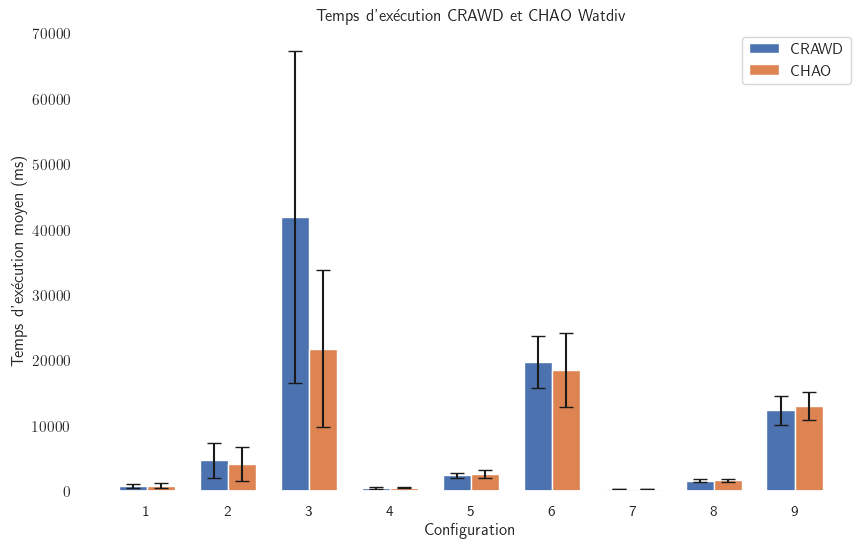

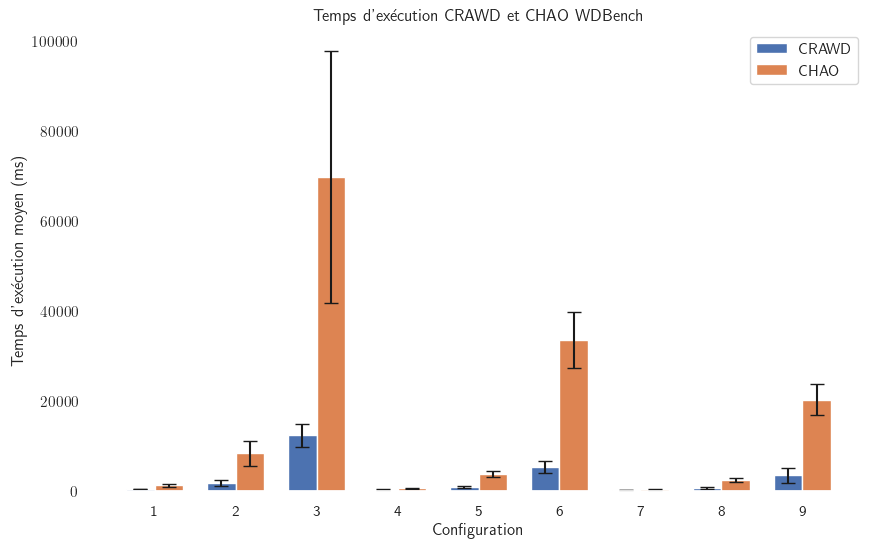

In [ ]:
## Plot ET data

import matplotlib.pyplot as plt
import numpy as np

def plot_execution_times(df_summary_crawd, df_summary_chao, title):
    """
    Trace la moyenne et l'écart type des temps d'exécution par configuration pour CRAWD et CHAO.

    Args:
        df_summary_crawd: DataFrame contenant les temps d'exécution de CRAWD.
        df_summary_chao: DataFrame contenant les temps d'exécution de CHAO.
        title: Titre du graphique.
    """

    # Largeur des barres
    bar_width = 0.35

    # Position des barres sur l'axe des x
    index = np.arange(len(df_summary_crawd['Config']))

    plt.figure(figsize=(10, 6))

    # Tracer les barres pour CRAWD et CHAO
    plt.bar(index, df_summary_crawd['mean'], bar_width, yerr=df_summary_crawd['std'], capsize=5, label='CRAWD')
    plt.bar(index + bar_width, df_summary_chao['mean'], bar_width, yerr=df_summary_chao['std'], capsize=5, label='CHAO')

    plt.xlabel('Configuration')
    plt.ylabel('Temps d\'exécution moyen (ms)')
    plt.title(title)
    plt.xticks(index + bar_width / 2, df_summary_crawd['Config'])  # Centrer les étiquettes des configurations
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemple d'utilisation:
plot_execution_times(crawd_et_watdiv, chao_et_watdiv, 'Temps d\'exécution CRAWD et CHAO Watdiv ')
plot_execution_times(crawd_et_wdbench, chao_et_wdbench, 'Temps d\'exécution CRAWD et CHAO WDBench')

### Note: CRAWD can run in multi-threads while Chao-Lee-Fµ run in single thread.

# Aggregate Views of Watdiv and WDBench i hope




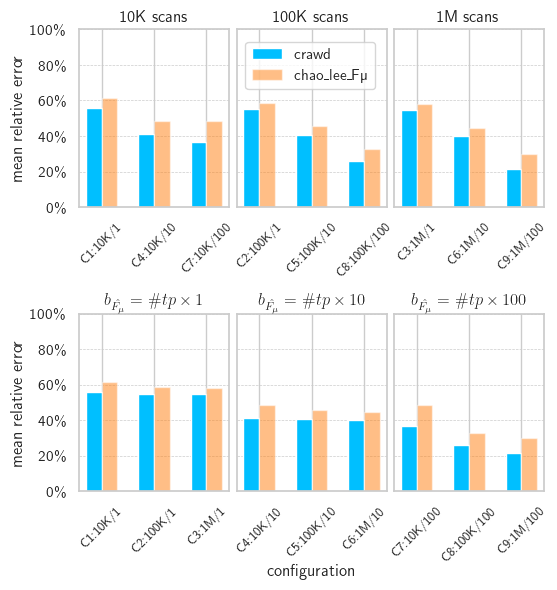

In [ ]:
# Labels for configurations
config_labels = {
    1: 'C1:10K/1',
    2: 'C2:100K/1',
    3: 'C3:1M/1',
    4: 'C4:10K/10',
    5: 'C5:100K/10',
    6: 'C6:1M/10',
    7: 'C7:10K/100',
    8: 'C8:100K/100',
    9: 'C9:1M/100'
}

# Configurations groups
config_groups = [
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
  ]

config_groups_limit = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
  ]
sns.set_theme(style="whitegrid")
# Plotting function
def plot_comparison(config_group, comparison, title, ax, first_col,second_col,first_line):
    subset = comparison[comparison['Config'].isin(config_group)]
    bar_width = 0.3
    index = range(len(subset))
    bar1 = subset['relative_error_crawd']
    bar2 = subset['relative_error_chao']
    rects1 = ax.bar([i - bar_width/2 for i in index], bar1, bar_width, label='crawd',color = mcolors.CSS4_COLORS['deepskyblue'])
    rects2 = ax.bar([i + bar_width/2 for i in index], bar2, bar_width, label='chao_lee_Fµ',color='tab:orange',alpha=0.5)

    if second_col:
        ax.set_xlabel('configuration')

    if first_col:
        ax.set_ylabel('mean relative error')
    if first_line:
        ax.set_xlabel('configuration').set_visible(False)
    ax.set_title(title,fontsize=12)
    ax.set_xticks(index)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.set_xticklabels([config_labels[config] for config in subset['Config']],rotation=45,fontsize=9)
    ax.legend(loc='center left', bbox_to_anchor=(0.55, 0.93)).set_visible(False)
    ax.set_ylim(0,100)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

import matplotlib.colors as mcolors
def make_plots_overall(comparison,figsize):
  # Création des sous-figures avec un seul axe Y partagé
  #fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, gridspec_kw={'wspace': 0.05})
  plot_comparison(config_groups[0], comparison, '10K scans', axs[0,0],  first_col=True,second_col=False,first_line=True)
  plot_comparison(config_groups[1], comparison,'100K scans', axs[0,1],  first_col=False,second_col=True,first_line=True)
  plot_comparison(config_groups[2], comparison,'1M scans', axs[0,2],  first_col=False,second_col=False,first_line=True)
  #handles, labels = axs[0].get_legend_handles_labels()
  #fig.legend(handles, labels, loc='center', ncol=1,bbox_to_anchor=(0.5, 0.75))
  #plt.show()
  #plt.subplots_adjust(hspace=0.4)

  #fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, gridspec_kw={'wspace': 0.05})
  plot_comparison(config_groups_limit[0],comparison, r'$b_{\hat{F_{\mu}}}= \#tp \times 1$', axs[1,0], first_col=True,second_col=False,first_line=False)
  plot_comparison(config_groups_limit[1],comparison, r'$b_{\hat{F_{\mu}}}= \#tp \times 10$', axs[1,1],  first_col=False,second_col=True,first_line=False)
  plot_comparison(config_groups_limit[2],comparison, r'$b_{\hat{F_{\mu}}}= \#tp \times 100$', axs[1,2],  first_col=False,second_col=False,first_line=False)

  handles, labels = axs[0,1].get_legend_handles_labels()
  fig.legend(handles, labels, loc='center', ncol=1, bbox_to_anchor=(0.51, 0.82))

  #plt.show()

fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharey=True, gridspec_kw={'wspace': 0.05,'hspace':0.6})

comparison_watdiv = pd.merge(crawd_summary_watdiv, chao_summary_watdiv, on='Config', suffixes=('_crawd', '_chao'))

make_plots_overall(comparison_watdiv,(7, 3))

plt.show()


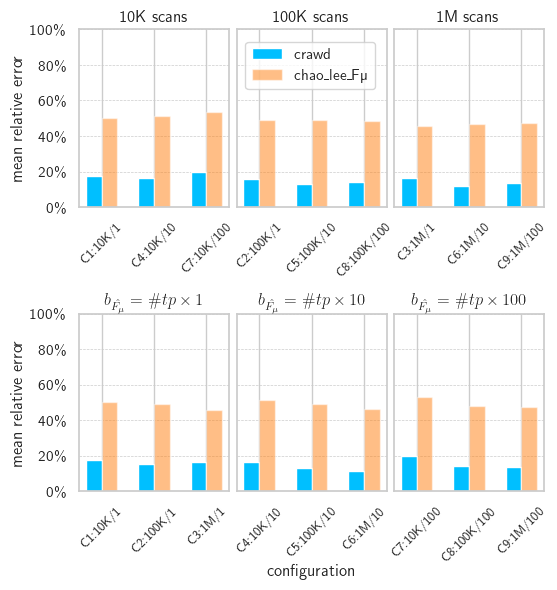

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharey=True, gridspec_kw={'wspace': 0.05,'hspace':0.6})
comparison_wdbench = pd.merge(crawd_summary_wdbench, chao_summary_wdbench, on='Config', suffixes=('_crawd', '_chao'))
make_plots_overall(comparison_wdbench,(7, 3))
plt.show()

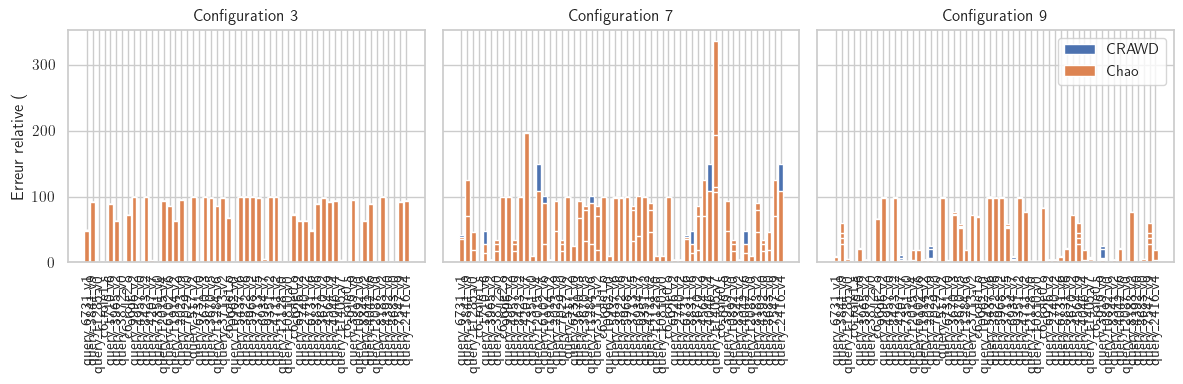

In [ ]:
# prompt: Je veux un bar plot l'evolution de l'erreur relative de cd par rapport à dv par requête pour les configuration 3, 7 et 9

import matplotlib.pyplot as plt
# Sélectionner les configurations 3, 7 et 9
configs = [3, 7, 9]
crawd_subset = crawd_watdiv[crawd_watdiv['Config'].isin(configs)]
chao_subset = chao_watdiv[chao_watdiv['Config'].isin(configs)]

# Créer un DataFrame pour chaque configuration
crawd_3 = crawd_subset[crawd_subset['Config'] == 3]
crawd_7 = crawd_subset[crawd_subset['Config'] == 7]
crawd_9 = crawd_subset[crawd_subset['Config'] == 9]

chao_3 = chao_subset[chao_subset['Config'] == 3]
chao_7 = chao_subset[chao_subset['Config'] == 7]
chao_9 = chao_subset[chao_subset['Config'] == 9]

# Tracer les bar plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Configuration 3
axs[0].bar(crawd_3['query'], crawd_3['relative_error'], label='CRAWD')
axs[0].bar(chao_3['query'], chao_3['relative_error'], label='Chao')
axs[0].set_title('Configuration 3')
axs[0].set_ylabel('Erreur relative (%)')
axs[0].tick_params(axis='x', rotation=90)

# Configuration 7
axs[1].bar(crawd_7['query'], crawd_7['relative_error'], label='CRAWD')
axs[1].bar(chao_7['query'], chao_7['relative_error'], label='Chao')
axs[1].set_title('Configuration 7')
axs[1].tick_params(axis='x', rotation=90)

# Configuration 9
axs[2].bar(crawd_9['query'], crawd_9['relative_error'], label='CRAWD')
axs[2].bar(chao_9['query'], chao_9['relative_error'], label='Chao')
axs[2].set_title('Configuration 9')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.legend()
plt.show()


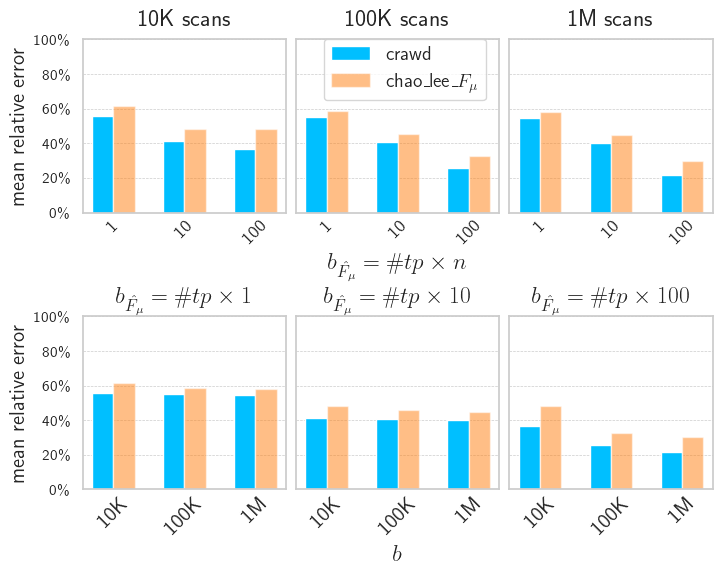

In [ ]:
# Labels for configurations
config_labels = {
    1: '10K',
    2: '100K',
    3: '1M',
    4: '10K',
    5: '100K',
    6: '1M',
    7: '10K',
    8: '100K',
    9: '1M'
}
config_labels_2 = {
    1: '1',
    2: '1',
    3: '1',
    4: '10',
    5: '10',
    6: '10',
    7: '100',
    8: '100',
    9: '100'
}

# Configurations groups
config_groups = [
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
  ]

config_groups_limit = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
  ]

# Plotting function
def plot_comparison(config_group, comparison, title, ax, first_col,second_col,first_line,first_grid):
    subset = comparison[comparison['Config'].isin(config_group)]
    bar_width = 0.3
    index = range(len(subset))
    bar1 = subset['relative_error_crawd']
    bar2 = subset['relative_error_chao']
    rects1 = ax.bar([i - bar_width/2 for i in index], bar1, bar_width, label='crawd',color=mcolors.CSS4_COLORS['deepskyblue'])
    rects2 = ax.bar([i + bar_width/2 for i in index], bar2, bar_width, label=r'chao_lee_$F_{\mu}$',color='tab:orange',alpha=0.5)

    if second_col and not first_grid:
        ax.set_xlabel('$b$',fontsize=17,fontweight='bold')

    if first_col:
        ax.set_ylabel('mean relative error',fontsize=15)
    if first_line and second_col:
        ax.set_xlabel(r'$b_{\hat{F_{\mu}}} = \#tp \times n $',fontsize=17,fontweight='bold')
    ax.set_title(title,fontsize=17,y=1.03,fontweight='bold')
    ax.set_xticks(index)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    if not first_grid:
      ax.set_xticklabels([config_labels[config] for config in subset['Config']],rotation=45,fontsize=15,y=0.05)
    else:
      ax.set_xticklabels([config_labels_2[config] for config in subset['Config']],rotation=45,fontsize=13,y=0.05)
    ax.legend(loc='center left', bbox_to_anchor=(0.55, 0.93)).set_visible(False)
    ax.set_ylim(0,100)
    ax.grid(False)
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

import matplotlib.colors as mcolors
def make_plots_overall(comparison,figsize):
  # Création des sous-figures avec un seul axe Y partagé
  #fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, gridspec_kw={'wspace': 0.05})
  plot_comparison(config_groups[0], comparison, '10K scans', axs[0,0],  first_col=True,second_col=False,first_line=True,first_grid=True)
  plot_comparison(config_groups[1], comparison,'100K scans', axs[0,1],  first_col=False,second_col=True,first_line=True,first_grid=True)
  plot_comparison(config_groups[2], comparison,'1M scans', axs[0,2],  first_col=False,second_col=False,first_line=True,first_grid=True)
  #handles, labels = axs[0].get_legend_handles_labels()
  #fig.legend(handles, labels, loc='center', ncol=1,bbox_to_anchor=(0.5, 0.75))
  #plt.show()
  #plt.subplots_adjust(hspace=0.4)

  #fig, axs = plt.subplots(1, 3, figsize=figsize, sharey=True, gridspec_kw={'wspace': 0.05})
  plot_comparison(config_groups_limit[0],comparison, r'$b_{\hat{F_{\mu}}}= \#tp \times 1$', axs[1,0], first_col=True,second_col=False,first_line=False,first_grid=False)
  plot_comparison(config_groups_limit[1],comparison, r'$b_{\hat{F_{\mu}}}= \#tp \times 10$', axs[1,1],  first_col=False,second_col=True,first_line=False,first_grid=False)
  plot_comparison(config_groups_limit[2],comparison, r'$b_{\hat{F_{\mu}}}= \#tp \times 100$', axs[1,2],  first_col=False,second_col=False,first_line=False,first_grid=False)

  handles, labels = axs[0,0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='center', ncol=1, bbox_to_anchor=(0.51, 0.9),fontsize=14)

  #plt.show()
scale = 0.5
fig, axs = plt.subplots(2, 3, figsize=(14*scale, 12*scale), sharey=True, gridspec_kw={'wspace': 0.05,'hspace':0.6})

comparison_watdiv = pd.merge(crawd_summary_watdiv, chao_summary_watdiv, on='Config', suffixes=('_crawd', '_chao'))

make_plots_overall(comparison_watdiv,(6, 3))

plt.show()


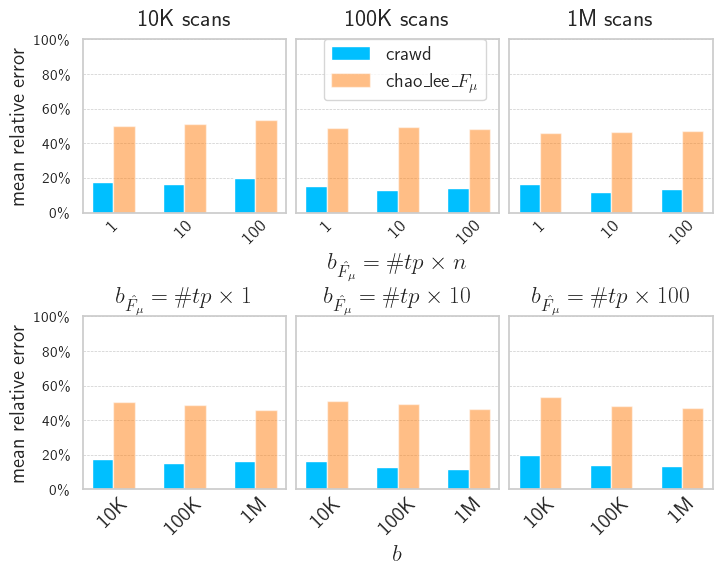

In [ ]:
scale = 0.5
fig, axs = plt.subplots(2, 3, figsize=(14*scale, 12*scale), sharey=True, gridspec_kw={'wspace': 0.05,'hspace':0.6})

comparison_wdbench = pd.merge(crawd_summary_wdbench, chao_summary_wdbench, on='Config', suffixes=('_crawd', '_chao'))

make_plots_overall(comparison_wdbench,(6, 3))

plt.show()

### Plot Relative error with order in number of triples

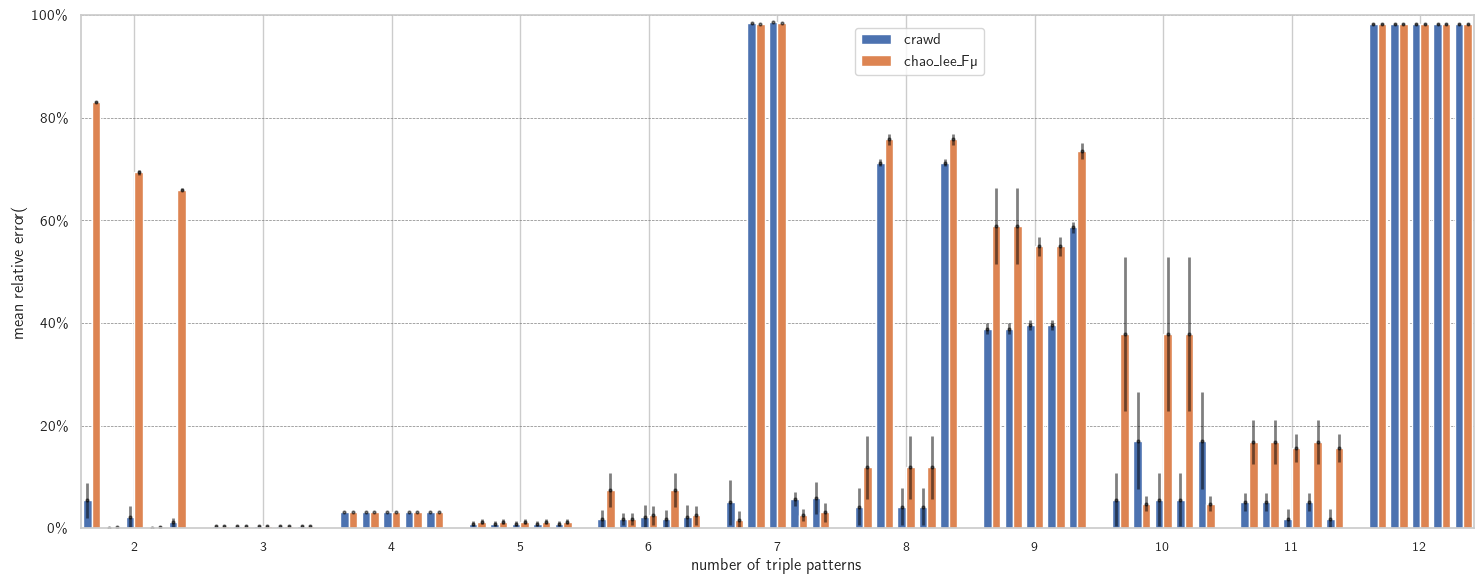

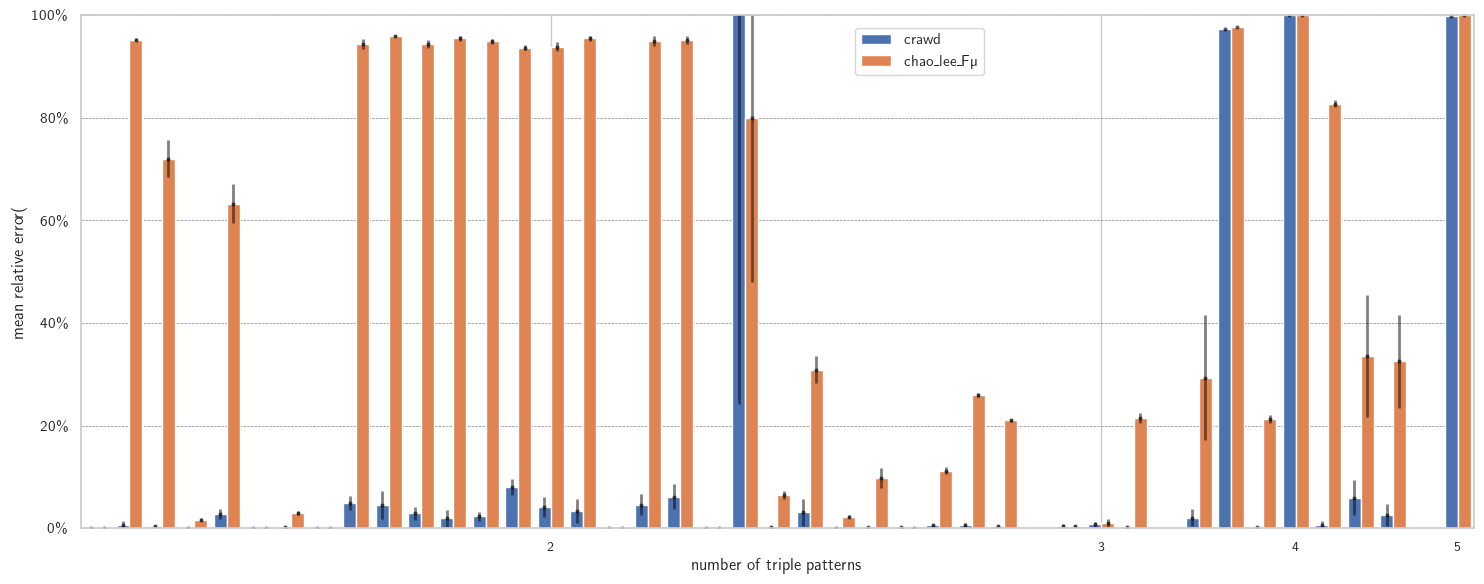

In [ ]:
import numpy as np
def plot_relative_error_order_nbtp_errorbar(config, crawd, chao):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]

    crawd_stats = crawd_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()
    chao_stats = chao_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()

    comparison_config = pd.merge(crawd_stats, chao_stats, on='query', suffixes=('_crawd', '_chao'))
    comparison_config = comparison_config.merge(crawd[['query','nbtp']], on='query', how='left')
    comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
    comparison_config = comparison_config.groupby('query').mean().reset_index()
    comparison_config.sort_values(by='nbtp', inplace=True)

    fig, ax = plt.subplots(figsize=(15, 6))

    bar_width = 0.4
    index = np.arange(len(comparison_config))
    bar1 = comparison_config['mean_crawd']
    bar2 = comparison_config['mean_chao']

    error1 = np.sqrt(comparison_config['var_crawd'])
    error2 = np.sqrt(comparison_config['var_chao'])
    # Create a list of positions with gaps between nbtp groups
    nbtp_groups = comparison_config['nbtp'].unique()
    positions = []
    nbtp_labels = []
    current_pos = 0
    for nbtp in nbtp_groups:
        group_size = len(comparison_config[comparison_config['nbtp'] == nbtp])
        group_positions = np.arange(current_pos, current_pos + group_size)
        positions.extend(group_positions)
        nbtp_labels.append((group_positions[0] + group_positions[-1]) / 2)  # Center of the group
        current_pos += group_size + 1

    rects1 = ax.bar([p - bar_width/2 for p in positions], bar1, bar_width, label='crawd')
    err1 = ax.errorbar([p - bar_width/2 for p in positions], bar1, yerr=error1, capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)
    rects2 = ax.bar([p + bar_width/2 for p in positions], bar2, bar_width, label='chao_lee_Fµ')
    err2 = ax.errorbar([p + bar_width/2 for p in positions], bar2, yerr=error2,  capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)

    # Ajouter des labels, titre et

    ax.set_xlabel('number of triple patterns',fontsize=12)
    ax.set_ylabel('mean relative error(%)',fontsize=12)
    ax.set_xticks(nbtp_labels)
    ax.set_xticklabels([f"{int(nbtp)}" for nbtp in nbtp_groups], fontsize=10)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.legend(loc='center left', bbox_to_anchor=(0.55, 0.93))
    plt.ylim(0, 100)
    plt.grid(axis='y', color='gray', linestyle='dashed', linewidth=0.5)
    plt.tight_layout()
    plt.xlim(-0.5, positions[-1] + 0.5)
    plt.show()
plot_relative_error_order_nbtp_errorbar(9,crawd_watdiv,chao_watdiv)
#plot_relative_error_order_nbtp_errorbar(8,crawd_watdiv,chao_watdiv)
plot_relative_error_order_nbtp_errorbar(9,crawd_wdbench,chao_wdbench)

##Plot with indicator if result is trustable!

In [ ]:
def compute_diff_proportion(crawd, config1, config2,threshold):
    mean_crawd_configs = {}
    configs = [config1, config2]

    for config in configs:
        df = crawd[crawd['Config'] == config]
        agg_df = df.groupby('query')['cd'].agg(['mean', 'std']).reset_index()
        agg_df.columns = ['query', f'cd_mean_{config}', f'cd_std_{config}']
        mean_crawd_configs[config] = agg_df

    # Merge dataframes on query
    merged_df = mean_crawd_configs[config1]
    for config in configs[1:]:
        merged_df = merged_df.merge(mean_crawd_configs[config], on='query')

    # Calculate differences and proportions
    merged_df["indicator"] = merged_df[f'cd_mean_{config2}']  / merged_df[f'cd_mean_{config1}']
    # Create boolean column based on threshold
    merged_df["ok_flag"] = (merged_df["indicator"] > (1 - threshold)) & (merged_df["indicator"] < (1 + threshold))

    return merged_df

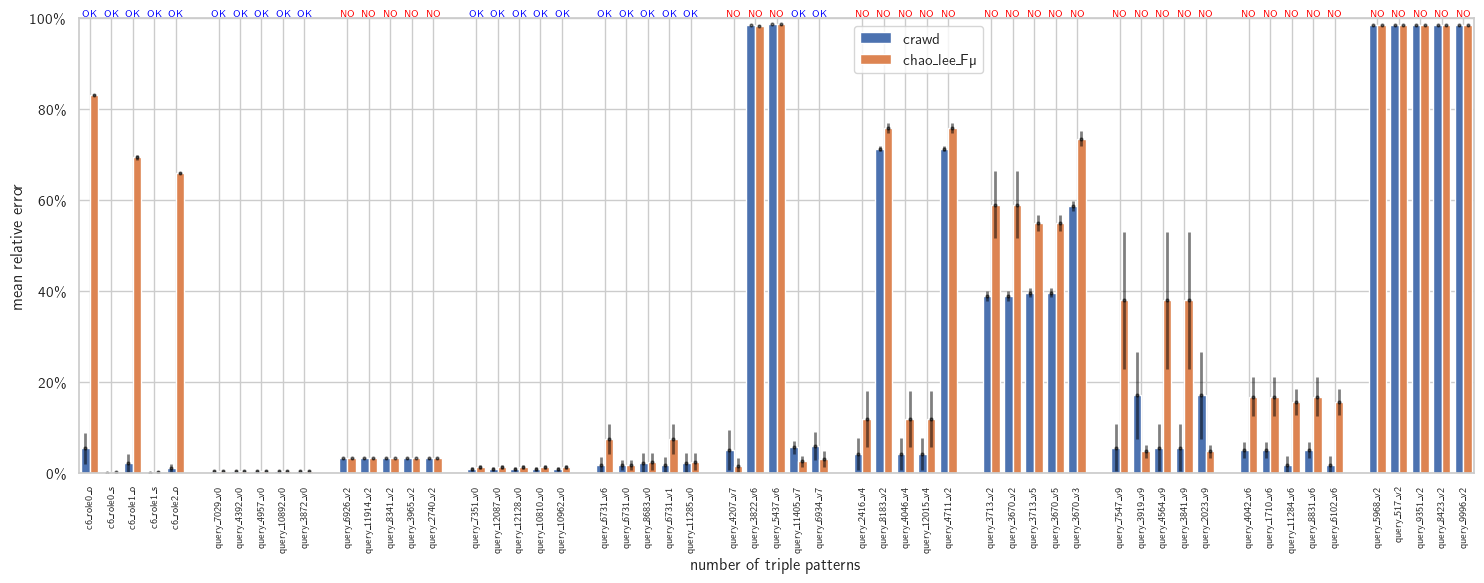

In [ ]:
def plot_relative_error_order_nbtp_errorbar_trust(config, crawd, chao,crawd_flag):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]

    crawd_stats = crawd_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()
    chao_stats = chao_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()

    comparison_config = pd.merge(crawd_stats, chao_stats, on='query', suffixes=('_crawd', '_chao'))
    comparison_config = comparison_config.merge(crawd_flag[['query','ok_flag']], on='query', how='left')

    comparison_config = comparison_config.merge(crawd[['query','nbtp']], on='query', how='left')
    comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
    # Calculate means and variances separately for numerical columns
    numeric_columns = ['mean_crawd', 'var_crawd', 'mean_chao', 'var_chao', 'nbtp']
    comparison_config_numeric = comparison_config.groupby('query')[numeric_columns].mean().reset_index()

    # Get ok_flag directly without aggregation as it is boolean
    comparison_config_ok_flag = comparison_config.groupby('query')['ok_flag'].first().reset_index()

    crawd_flag['ok_flag'] = crawd_flag['ok_flag'].astype(bool)
    comparison_config = pd.merge(comparison_config_numeric, comparison_config_ok_flag, on='query')
    comparison_config.reset_index(drop=True, inplace=True)
    comparison_config = pd.merge(comparison_config_numeric, comparison_config_ok_flag, on='query')
    comparison_config.reset_index(drop=True, inplace=True)
    comparison_config.sort_values(by='nbtp', inplace=True)
    comparison_config.reset_index(drop=True, inplace=True)
    fig, ax = plt.subplots(figsize=(15, 6))

    bar_width = 0.4
    index = np.arange(len(comparison_config))
    bar1 = comparison_config['mean_crawd']
    bar2 = comparison_config['mean_chao']

    error1 = np.sqrt(comparison_config['var_crawd'])
    error2 = np.sqrt(comparison_config['var_chao'])
    # Create a list of positions with gaps between nbtp groups
    nbtp_groups = comparison_config['nbtp'].unique()
    positions = []
    nbtp_labels = []
    current_pos = 0
    for nbtp in nbtp_groups:
        group_size = len(comparison_config[comparison_config['nbtp'] == nbtp])
        group_positions = np.arange(current_pos, current_pos + group_size)
        positions.extend(group_positions)
        nbtp_labels.append((group_positions[0] + group_positions[-1]) / 2)  # Center of the group
        current_pos += group_size + 1

    rects1 = ax.bar([p - bar_width/2 for p in positions], bar1, bar_width, label='crawd')
    err1 = ax.errorbar([p - bar_width/2 for p in positions], bar1, yerr=error1, capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)
    rects2 = ax.bar([p + bar_width/2 for p in positions], bar2, bar_width, label='chao_lee_Fµ')
    err2 = ax.errorbar([p + bar_width/2 for p in positions], bar2, yerr=error2,  capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)

    # Add "OK" or "NO" labels based on ok_flag
    for i, row in comparison_config.iterrows():
        x_pos = (positions[i] - bar_width/2 + positions[i] + bar_width/2) / 2

        y_pos = 0.5
        y_pos += 0.96*ax.get_ylim()[1]

        text = "OK" if row['ok_flag']==True else "NO"
        color = "blue" if row['ok_flag']==True else "red"
        ax.text(x_pos, y_pos, text, ha='center', va='bottom', color=color, fontsize=7)


    ax.set_xlabel('number of triple patterns',fontsize=12)
    ax.set_ylabel('mean relative error',fontsize=12)
    #ax.set_xticks(nbtp_labels)
    #ax.set_xticklabels([f"{int(nbtp)}" for nbtp in nbtp_groups], fontsize=10, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(comparison_config['query'], rotation=90,fontsize = 7)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.legend(loc='center left', bbox_to_anchor=(0.55, 0.93))
    plt.ylim(0, 100)
    #plt.grid(axis='y', color='gray', linestyle='dashed', linewidth=0.5)
    plt.tight_layout()
    plt.xlim(-0.5, positions[-1] + 0.5)
    plt.show()
crawd_watdiv_flagged = compute_diff_proportion(crawd_watdiv, 5, 9, 0.1)
plot_relative_error_order_nbtp_errorbar_trust(9,crawd_watdiv,chao_watdiv,crawd_watdiv_flagged)


In [ ]:
crawd_watdiv['query'] = crawd_watdiv['query'].astype(str).str.replace('query_', 'q_', regex=False)
chao_watdiv['query'] = chao_watdiv['query'].astype(str).str.replace('query_', 'q_', regex=False)
crawd_watdiv_flagged['query'] = crawd_watdiv_flagged['query'].astype(str).str.replace('query_', 'q_', regex=False)

## WATDIV10M: Relative error of config 9 and indicators per query ordered by number of triple patterns

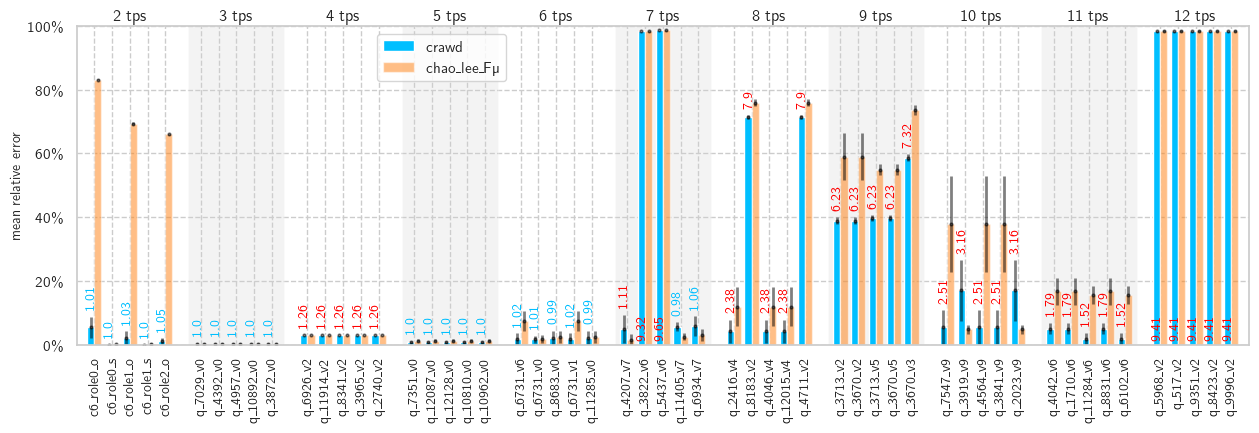

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.linewidth': 0.05})
def plot_relative_error_order_nbtp_errorbar_trust(config, crawd, chao,crawd_flag,threshold):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]

    crawd_stats = crawd_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()
    chao_stats = chao_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()

    comparison_config = pd.merge(crawd_stats, chao_stats, on='query', suffixes=('_crawd', '_chao'))
    comparison_config = comparison_config.merge(crawd_flag[['query','indicator']], on='query', how='left')

    comparison_config = comparison_config.merge(crawd[['query','nbtp']], on='query', how='left')
    comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
    comparison_config = comparison_config.groupby('query').mean().reset_index()
    comparison_config.sort_values(by='nbtp', inplace=True)
    comparison_config.reset_index(drop=True, inplace=True)
    scale = 0.75
    fontsize = 12
    fig, ax = plt.subplots(figsize=(17*scale, 6*scale))

    bar_width = 0.4
    index = np.arange(len(comparison_config))
    bar1 = comparison_config['mean_crawd']
    bar2 = comparison_config['mean_chao']

    error1 = np.sqrt(comparison_config['var_crawd'])
    error2 = np.sqrt(comparison_config['var_chao'])
    # Create a list of positions with gaps between nbtp groups
    nbtp_groups = comparison_config['nbtp'].unique()
    positions = []
    nbtp_labels = []
    current_pos = 0
    for i, nbtp in enumerate(nbtp_groups):
        group_size = len(comparison_config[comparison_config['nbtp'] == nbtp])
        group_positions = np.arange(current_pos, current_pos + group_size)
        positions.extend(group_positions)
        nbtp_labels.append((group_positions[0] + group_positions[-1]) / 2)  # Center of the group
        current_pos += group_size + 1
        if i % 2 != 0:
            ax.axvspan(group_positions[0] - 0.7, group_positions[-1] + 0.7, facecolor='lightgrey', alpha=0.25)


    rects1 = ax.bar([p - bar_width/2 for p in positions], bar1, bar_width, label='crawd',color=mcolors.CSS4_COLORS['deepskyblue'])
    err1 = ax.errorbar([p - bar_width/2 for p in positions], bar1, yerr=error1, capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)
    rects2 = ax.bar([p + bar_width/2 for p in positions], bar2, bar_width, label='chao_lee_Fµ',color='tab:orange',alpha = 0.5)
    err2 = ax.errorbar([p + bar_width/2 for p in positions], bar2, yerr=error2,  capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)

        # Add "OK" or "NO" labels based on ok_flag
    for i, row in comparison_config.iterrows():
        x_pos = positions[i] - bar_width/2
        y_pos = bar1[i] + error1[i]+ 2
        if y_pos > 90:
            y_pos = 1

        text = round(row['indicator'],2) if not pd.isna(row['indicator']) else "inf"
        color = mcolors.CSS4_COLORS['deepskyblue'] if (row["indicator"] > (1 - threshold)) & (row["indicator"] < (1 + threshold)) else "red"

        ax.text(x_pos, y_pos, text, ha='center', va='bottom',alpha=1, color=color, fontsize=10,rotation=90,fontweight='bold')


    #ax.set_xlabel('number of triple patterns',fontsize=12)
    ax.set_ylabel('mean relative error',fontsize=fontsize-2)
    #ax.set_xticks(nbtp_labels)
    #ax.set_xticklabels([f"{int(nbtp)}" for nbtp in nbtp_groups], fontsize=10, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(comparison_config['query'], rotation=90,fontsize = fontsize-2)

    for i, nbtp in enumerate(nbtp_groups):
        x_pos = nbtp_labels[i]
        y_pos = 0.97 *ax.get_ylim()[1]
        ax.text(x_pos, y_pos, f"{int(nbtp)} tps", ha='center', va='bottom', fontsize=fontsize,fontweight='bold')

    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.legend(loc='center left', bbox_to_anchor=(0.25, 0.9))
    plt.ylim(0, 100)
    #plt.grid(axis='y', color='gray', linestyle='dashed', linewidth=0.5)
    plt.tight_layout()
    plt.xlim(-1, positions[-1] + 1)
    plt.show()
crawd_watdiv_flagged = compute_diff_proportion(crawd_watdiv, 5, 9, 0.1)
plot_relative_error_order_nbtp_errorbar_trust(9,crawd_watdiv,chao_watdiv,crawd_watdiv_flagged,0.1)


## WDBENCH: Relative error of config 9 and indicators per query ordered by number of triple patterns

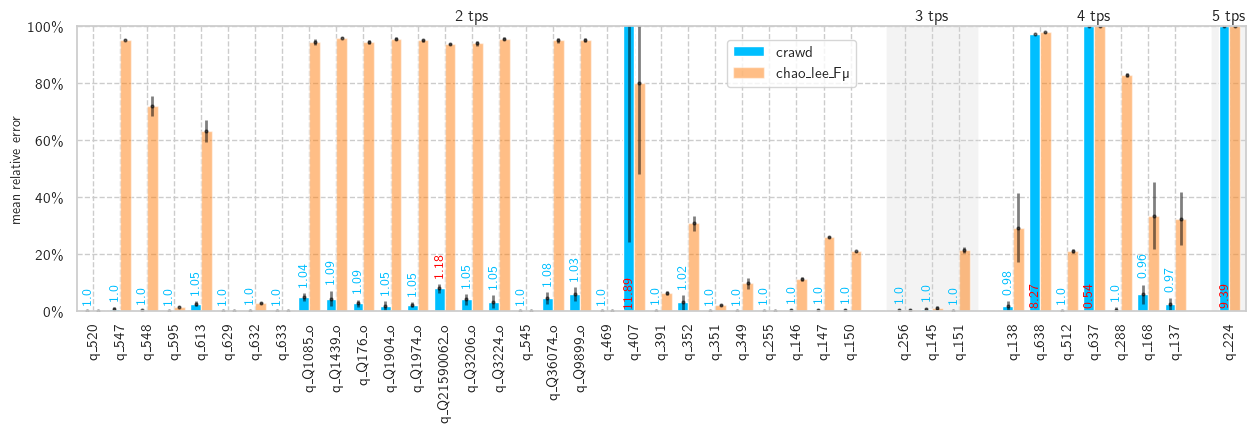

In [ ]:
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.linewidth': 0.05})
def plot_relative_error_order_nbtp_errorbar_trust_wdbench(config, crawd, chao,crawd_flag,threshold):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]

    crawd_stats = crawd_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()
    chao_stats = chao_config.groupby('query')['relative_error'].agg(['mean', 'var']).reset_index()

    comparison_config = pd.merge(crawd_stats, chao_stats, on='query', suffixes=('_crawd', '_chao'))
    comparison_config = comparison_config.merge(crawd_flag[['query','indicator']], on='query', how='left')

    comparison_config = comparison_config.merge(crawd[['query','nbtp']], on='query', how='left')
    comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
    comparison_config = comparison_config.groupby('query').mean().reset_index()
    comparison_config.sort_values(by='nbtp', inplace=True)
    comparison_config.reset_index(drop=True, inplace=True)
    scale = 0.75
    fig, ax = plt.subplots(figsize=(17*scale, 6*scale))
    #ax2 = ax.twiny()
    bar_width = 0.4
    index = np.arange(len(comparison_config))
    bar1 = comparison_config['mean_crawd']
    bar2 = comparison_config['mean_chao']

    error1 = np.sqrt(comparison_config['var_crawd'])
    error2 = np.sqrt(comparison_config['var_chao'])
    # Create a list of positions with gaps between nbtp groups
    nbtp_groups = comparison_config['nbtp'].unique()
    positions = []
    nbtp_labels = []
    current_pos = 0
    for i, nbtp in enumerate(nbtp_groups):
        group_size = len(comparison_config[comparison_config['nbtp'] == nbtp])
        group_positions = np.arange(current_pos, current_pos + group_size)
        positions.extend(group_positions)
        nbtp_labels.append((group_positions[0] + group_positions[-1]) / 2)  # Center of the group
        current_pos += group_size + 1
        if i % 2 != 0:
            ax.axvspan(group_positions[0] - 0.7, group_positions[-1] + 0.7, facecolor='lightgrey', alpha=0.25)

    rects1 = ax.bar([p - bar_width/2 for p in positions], bar1, bar_width, label='crawd',color=mcolors.CSS4_COLORS['deepskyblue'])
    err1 = ax.errorbar([p - bar_width/2 for p in positions], bar1, yerr=error1, capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)
    rects2 = ax.bar([p + bar_width/2 for p in positions], bar2, bar_width, label='chao_lee_Fµ',color='tab:orange',alpha = 0.5)
    err2 = ax.errorbar([p + bar_width/2 for p in positions], bar2, yerr=error2,  capsize=0,fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4)

    # Add "OK" or "NO" labels based on ok_flag
    for i, row in comparison_config.iterrows():
        x_pos = positions[i] - bar_width/2
        y_pos = bar1[i] + error1[i]+ 2
        if y_pos > 50:
            y_pos = 1

        text = round(row['indicator'],2) if not pd.isna(row['indicator']) else "inf"
        color = mcolors.CSS4_COLORS['deepskyblue'] if (row["indicator"] > (1 - threshold)) & (row["indicator"] < (1 + threshold)) else "red"

        ax.text(x_pos, y_pos, text, ha='center', va='bottom',alpha=1, color=color, fontsize=10,rotation=90,fontweight='bold')


    #ax.set_xlabel('query',fontsize=12)
    ax.set_ylabel('mean relative error',fontsize=10)
    #ax.set_xticks(nbtp_labels)
    #ax.set_xticklabels([f"{int(nbtp)}" for nbtp in nbtp_groups], fontsize=10, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(comparison_config['query'], rotation=90,fontsize = 11)
    for i, nbtp in enumerate(nbtp_groups):
      x_pos = nbtp_labels[i]
      y_pos = 0.27*ax.get_ylim()[1]
      ax.text(x_pos, y_pos, f"{int(nbtp)} tps", ha='center', va='bottom', fontsize=12,fontweight='bold')
    #ax2.set_xlim(ax.get_xlim())
    #ax2.set_xticks(nbtp_labels)
    #ax2.set_xticklabels([f"{int(nbtp)} tps" for nbtp in nbtp_groups], fontsize=10, fontweight='bold')
    #ax2.set_xlabel('number of triple patterns in the query', fontsize=12)
    #ax2.grid(False)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.legend(loc='center left', bbox_to_anchor=(0.55, 0.87))
    plt.ylim(0, 100)
    plt.xlim(positions[0] - bar_width*1.5, positions[-1] + bar_width*1.5)
    plt.tight_layout()
    #plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)  # Adjust margins to reduce space
    plt.show()
crawd_wdbench_flagged = compute_diff_proportion(crawd_wdbench, 5, 9, 0.1)
crawd_wdbench['query'] = crawd_wdbench['query'].astype(str).str.replace('query_', 'q_', regex=False)
chao_wdbench['query'] = chao_wdbench['query'].astype(str).str.replace('query_', 'q_', regex=False)
crawd_wdbench_flagged['query'] = crawd_wdbench_flagged['query'].astype(str).str.replace('query_', 'q_', regex=False)
plot_relative_error_order_nbtp_errorbar_trust_wdbench(9,crawd_wdbench,chao_wdbench,crawd_wdbench_flagged,0.1)


the plots that we made above using mean relative error of config 9.

### Compute Spearman's correlation between ["indicator"] with ["relative_error"] for specific config

In [ ]:
from scipy.stats import spearmanr
def compute_spearman_correlation(df,column1,column2):
  correlation, p_value = spearmanr(df[column1], df[column2])
  print(f"Spearman's Correlation Coefficient: {correlation}")
  print(f"P-value: {p_value}")

def prepare_data(crawd,crawd_flagged,config):
  crawd_config = crawd[crawd['Config'] == config]
  crawd_config_agg = crawd_config.groupby('query')['relative_error'].agg(['mean']).reset_index()
  crawd_flagged_agg = crawd_flagged.merge(crawd_config_agg , on='query', how='left')
  return crawd_flagged_agg


In [ ]:
crawd_watdiv_flagged_59 = compute_diff_proportion(crawd_watdiv, 5, 9, 0.1)
crawd_watdiv_flagged_15 = compute_diff_proportion(crawd_watdiv, 1, 5, 0.1)
crawd_watdiv_59 = prepare_data(crawd_watdiv,crawd_watdiv_flagged_59,9)
crawd_watdiv_15 = prepare_data(crawd_watdiv,crawd_watdiv_flagged_15,5)
compute_spearman_correlation(crawd_watdiv_59,'indicator','mean')
compute_spearman_correlation(crawd_watdiv_15,'indicator','mean')


Spearman's Correlation Coefficient: 0.872761491794295
P-value: 3.868995835527453e-18
Spearman's Correlation Coefficient: 0.9108699584011576
P-value: 5.069376415938494e-22


In [ ]:
crawd_wdbench_flagged_59 = compute_diff_proportion(crawd_wdbench, 5, 9, 0.1)
crawd_wdbench_flagged_15 = compute_diff_proportion(crawd_wdbench, 1, 5, 0.1)
crawd_wdbench_59 = prepare_data(crawd_wdbench,crawd_wdbench_flagged_59,9)
crawd_wdbench_15 = prepare_data(crawd_wdbench,crawd_wdbench_flagged_15,5)
compute_spearman_correlation(crawd_wdbench_59,'indicator','mean')
compute_spearman_correlation(crawd_wdbench_15,'indicator','mean')

Spearman's Correlation Coefficient: 0.5652500234543578
P-value: 0.00014449330174854254
Spearman's Correlation Coefficient: 0.7243643869030867
P-value: 1.2653216266389573e-07


In [ ]:
crawd_watdiv_flagged_19 = compute_diff_proportion(crawd_watdiv, 1, 9, 0.1)
crawd_watdiv_19 = prepare_data(crawd_watdiv,crawd_watdiv_flagged_19,9)
compute_spearman_correlation(crawd_watdiv_19,'indicator','mean')

Spearman's Correlation Coefficient: 0.8399189463019249
P-value: 1.1026840632645025e-15


In [ ]:
crawd_wdbench_flagged_19 = compute_diff_proportion(crawd_wdbench, 1, 9, 0.1)
crawd_wdbench_19 = prepare_data(crawd_wdbench,crawd_wdbench_flagged_19,9)
compute_spearman_correlation(crawd_wdbench_19,'indicator','mean')

Spearman's Correlation Coefficient: 0.6862745098039217
P-value: 1.0169566550850067e-06


### Examine query

In [ ]:
examine('query_5968_v2',9,crawd_watdiv,chao_watdiv)
examine('query_6926_v2',9,crawd_watdiv,chao_watdiv)

CRAWD query_5968_v2 (projected on 'cd'):
Empty DataFrame
Columns: [Run, cd, dv, error, relative_error, CRAWD_SampleSize, nbtp, count]
Index: []

CHAO query_5968_v2 (projected on 'cd'):
Empty DataFrame
Columns: [Run, cd, dv, error, relative_error, CHAOLEE_SampleSize, nbtp, count]
Index: []
CRAWD query_6926_v2 (projected on 'cd'):
Empty DataFrame
Columns: [Run, cd, dv, error, relative_error, CRAWD_SampleSize, nbtp, count]
Index: []

CHAO query_6926_v2 (projected on 'cd'):
Empty DataFrame
Columns: [Run, cd, dv, error, relative_error, CHAOLEE_SampleSize, nbtp, count]
Index: []


# Aggregate Views on \#TP
même échelle, Y partagé par toutes les configs...

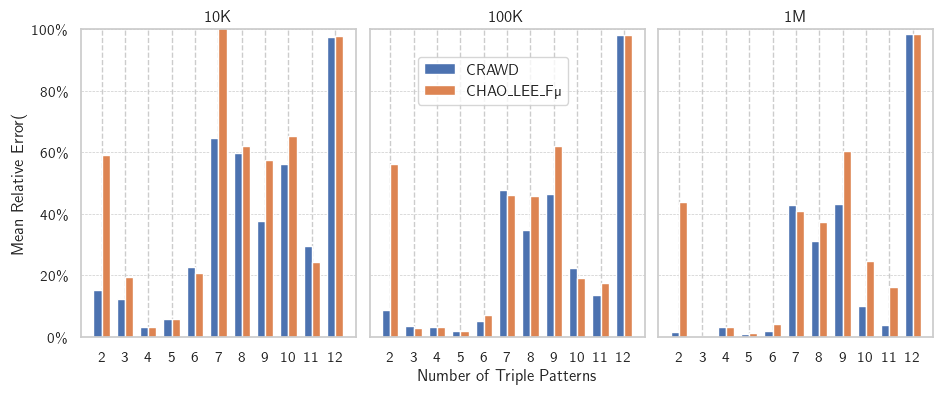

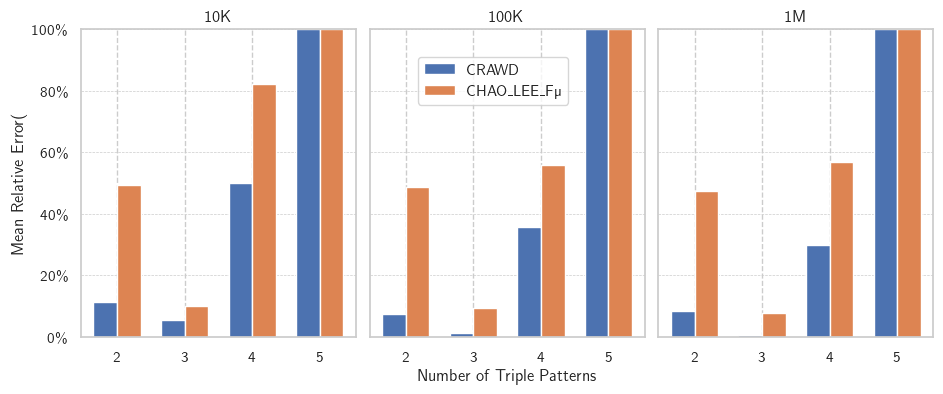

In [ ]:
#sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.linewidth': 0.05})
def plot_relative_error_pertp(config, crawd, chao, ax, first_col,second_col):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]

    # Calculer la moyenne des erreurs relatives pour chaque nombre de triple patterns (nbtp)
    crawd_mean_relative_error = crawd_config.groupby('nbtp')[['relative_error']].mean().reset_index()
    chao_mean_relative_error = chao_config.groupby('nbtp')[['relative_error']].mean().reset_index()

    comparison_relative_error_config = pd.merge(crawd_mean_relative_error, chao_mean_relative_error, on='nbtp', suffixes=('_crawd', '_chao'))
    comparison_relative_error_config = comparison_relative_error_config.sort_values(by='nbtp')

    # Largeur des barres
    bar_width = 0.35

    # Positions des barres sur l'axe x
    index = range(len(comparison_relative_error_config))
    bar1 = comparison_relative_error_config['relative_error_crawd']
    bar2 = comparison_relative_error_config['relative_error_chao']

    # Création des barres
    rects1 = ax.bar([i - bar_width/2 for i in index], bar1, bar_width, label='CRAWD')
    rects2 = ax.bar([i + bar_width/2 for i in index], bar2, bar_width, label='CHAO_LEE_Fµ')

    if second_col:
      ax.set_xlabel('Number of Triple Patterns')
    if first_col:
        ax.set_ylabel('Mean Relative Error(%)')
    ax.set_title(f'{config_labels[config]}')
    ax.set_xticks(index)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.set_xticklabels(comparison_relative_error_config['nbtp'])
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.set_ylim(0,100)


def make_plot_pertp(crawd,chao):
  # Créer des sous-figures avec un seul axe Y partagé
  fig, axs = plt.subplots(1, 3, figsize=(11, 4), sharey=True, gridspec_kw={'wspace': 0.05})

  # Tracer les graphiques pour les configurations 7, 8 et 9 avec les mêmes limites d'axe Y
  plot_relative_error_pertp(7, crawd, chao, axs[0], first_col=True,second_col=False)
  plot_relative_error_pertp(8, crawd, chao, axs[1],  first_col=False,second_col=True)
  plot_relative_error_pertp(9, crawd, chao, axs[2],  first_col=False,second_col=False)

  handles, labels = axs[0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='center', ncol=1,bbox_to_anchor=(0.5, 0.75))
  plt.show()

make_plot_pertp(crawd_watdiv,chao_watdiv)
make_plot_pertp(crawd_wdbench,chao_wdbench)


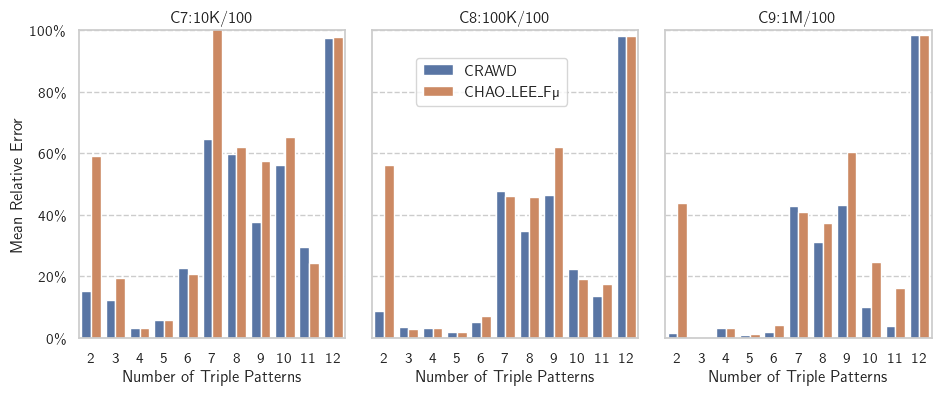

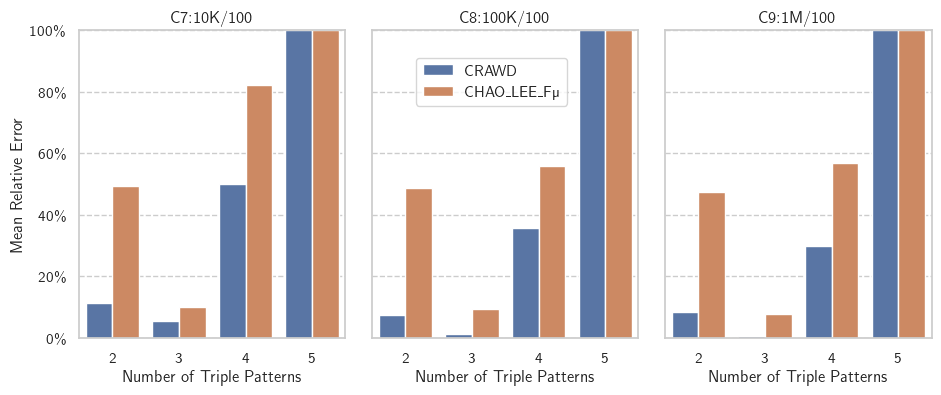

In [ ]:
config_labels = {
    1: 'C1:10K/1',
    2: 'C2:100K/1',
    3: 'C3:1M/1',
    4: 'C4:10K/10',
    5: 'C5:100K/10',
    6: 'C6:1M/10',
    7: 'C7:10K/100',
    8: 'C8:100K/100',
    9: 'C9:1M/100'
}

def plot_relative_error_per_tp_seaborn(config, crawd, chao, ax, first_col):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]

    # Calculate the mean relative errors for each number of triple patterns (nbtp)
    crawd_mean_relative_error = crawd_config.groupby('nbtp')[['relative_error']].mean().reset_index()
    chao_mean_relative_error = chao_config.groupby('nbtp')[['relative_error']].mean().reset_index()

    # Merge the data for comparison
    comparison_relative_error_config = pd.merge(
        crawd_mean_relative_error, chao_mean_relative_error, on='nbtp', suffixes=('_crawd', '_chao')
    )

    # Prepare data for Seaborn
    comparison_relative_error_config = comparison_relative_error_config.melt(
        id_vars='nbtp',
        value_vars=['relative_error_crawd', 'relative_error_chao'],
        var_name='Source',
        value_name='Mean Relative Error'
    )

    # Map the source labels to more readable names
    comparison_relative_error_config['Source'] = comparison_relative_error_config['Source'].map({
        'relative_error_crawd': 'CRAWD',
        'relative_error_chao': 'CHAO_LEE_Fµ'
    })

    # Create the bar plot using Seaborn
    sns.barplot(
        x='nbtp',
        y='Mean Relative Error',
        hue='Source',
        data=comparison_relative_error_config,
        ax=ax
    )

    ax.set_title(f'{config_labels[config]}')
    ax.set_xlabel('Number of Triple Patterns')
    if first_col:
        ax.set_ylabel('Mean Relative Error')
    ax.set_ylim(0,100)
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
    ax.legend_.remove()

def make_plot_pertp_seaborn(crawd,chao):
  # Créer des sous-figures avec un seul axe Y partagé
  fig, axs = plt.subplots(1, 3, figsize=(11, 4), sharey=True, gridspec_kw={'wspace': 0.1})

  # Tracer les graphiques pour les configurations 7, 8 et 9 avec les mêmes limites d'axe Y
  plot_relative_error_per_tp_seaborn(7, crawd, chao, axs[0], first_col=True)
  plot_relative_error_per_tp_seaborn(8, crawd, chao, axs[1], first_col=False)
  plot_relative_error_per_tp_seaborn(9, crawd, chao, axs[2], first_col=False)

  # Ajuster la mise en page
  #plt.tight_layout()

  # Créer une légende partagée
  handles, labels = axs[0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='center', ncol=1,bbox_to_anchor=(0.5, 0.75))
  #plt.grid(True, which="minor", ls="--")
  # Afficher le graphique
  plt.show()

make_plot_pertp_seaborn(crawd_watdiv,chao_watdiv)
make_plot_pertp_seaborn(crawd_wdbench,chao_wdbench)

# Jupyter graveyard

## first Plots just to see..

   Config  Run_crawd  error_crawd  relative_error_crawd  Run_chao  \
0       1        3.0  8130.011192             55.743331       3.0   
1       2        3.0  8389.673132             55.095080       3.0   

     error_chao  relative_error_chao  
0  18814.444089            61.527927  
1  17134.593908            58.789988  


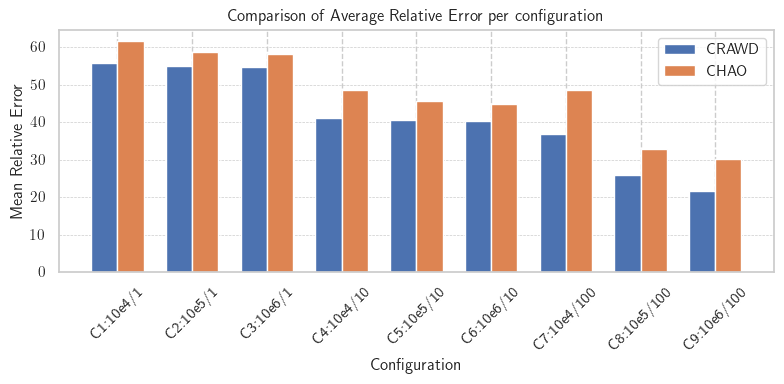

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que les DataFrames `crawd_summary` et `chao_summary` sont déjà calculés et disponibles

# Comparer les erreurs entre les configurations et les algorithmes
comparison = pd.merge(crawd_summary_watdiv, chao_summary_watdiv, on='Config', suffixes=('_crawd', '_chao'))

print(comparison.head(2))


# Définir des libellés spéciaux pour chaque configuration
config_labels = ['C1:10e4/1', 'C2:10e5/1', 'C3:10e6/1', 'C4:10e4/10', 'C5:10e5/10',
                 'C6:10e6/10', 'C7:10e4/100', 'C8:10e5/100', 'C9:10e6/100']


# Visualiser les résultats en utilisant un graphique à barres
fig, ax = plt.subplots(figsize=(8, 4))

# Largeur des barres
bar_width = 0.35

# Positions des barres sur l'axe x
index = comparison['Config']
bar1 = comparison['relative_error_crawd']
bar2 = comparison['relative_error_chao']

# Création des barres
rects1 = ax.bar(index - bar_width/2, bar1, bar_width, label='CRAWD')
rects2 = ax.bar(index + bar_width/2, bar2, bar_width, label='CHAO')

# Ajouter des labels, titre et légende
ax.set_xlabel('Configuration')
ax.set_ylabel('Mean Relative Error')

ax.set_title('Comparison of Average Relative Error per configuration ')
ax.set_xticks(index)
ax.set_xticklabels(config_labels, rotation=45)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()



## Relative Error vs Sample ratio

Try to see if relative error is correlated with Sample Ratio... (not clear, maybe...)

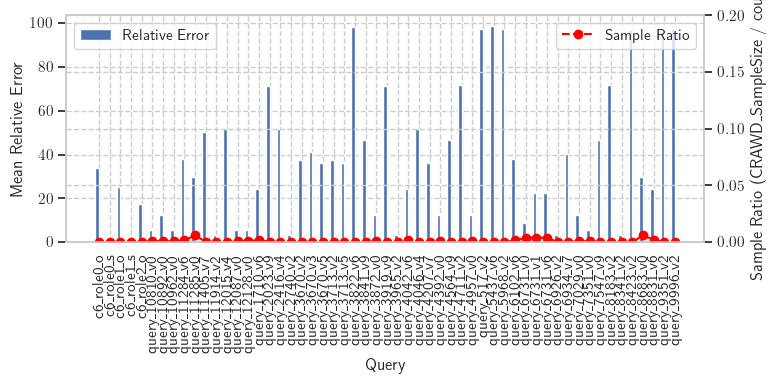

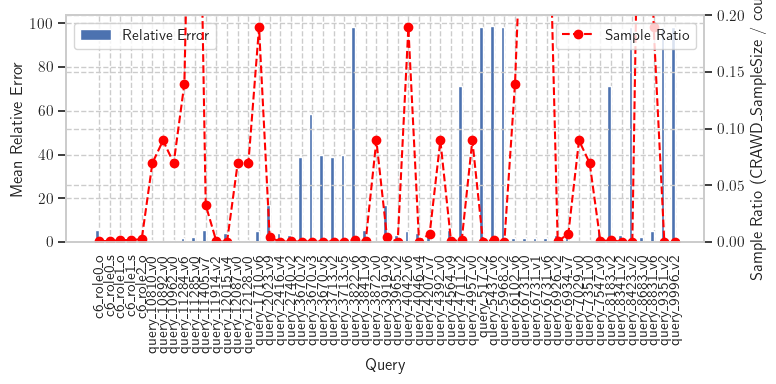

In [ ]:
# Calculer les erreurs absolue et relative pour chaque estimation en utilisant la colonne 'cd'
def calculate_errors(df, gt_df):
    df = df.merge(gt_df, on='query', suffixes=('', '_gt'))
    df['absolute_error'] = abs(df['cd'] - df['dv'])
    df['relative_error'] = abs(df['cd'] - df['dv']) / df['dv'] * 100
    df['sample_ratio'] = df['CRAWD_SampleSize'] / df['count']
    return df

def plot_sample_ratio(config,crawd,gt):

  # Calculer les erreurs pour chaque estimation
  crawd_sr = calculate_errors(crawd, gt)

  # Filtrer les données pour la configuration 9
  crawd_config = crawd_sr[crawd_sr['Config'] == config]

  # Calculer la moyenne des erreurs absolues et du ratio pour chaque requête
  crawd_mean_errors = crawd_config.groupby('query')[['absolute_error', 'relative_error', 'sample_ratio']].mean().reset_index()

  # Visualiser les résultats en utilisant un graphique à barres
  fig, ax1 = plt.subplots(figsize=(8, 4))

  # Largeur des barres
  bar_width = 0.35

  # Positions des barres sur l'axe x
  index = range(len(crawd_mean_errors))

  # Graphique pour l'erreur absolue moyenne
  rects1 = ax1.bar([i - bar_width/2 for i in index], crawd_mean_errors['relative_error'], bar_width, label='Relative Error')

  # Ajouter des labels et titre pour l'axe primaire
  ax1.set_xlabel('Query')
  ax1.set_ylabel('Mean Relative Error')
  #ax1.set_title(f'Mean Relative Error and Sample Ratio for Configuration {config_labels[config]} by Query')
  ax1.set_xticks(index)

  ax1.set_xticklabels(crawd_mean_errors['query'], rotation=90)
  #ax1.set_yscale('log')  # Définir l'échelle logarithmique pour l'axe des y
  ax1.legend(loc='upper left')

  # Création du deuxième axe y pour le ratio des échantillons
  ax2 = ax1.twinx()
  rects2 = ax2.plot(index, crawd_mean_errors['sample_ratio'], label='Sample Ratio', color='red', marker='o', linestyle='--')
  ax2.set_ylim(0,0.2)
  # Ajouter des labels pour l'axe secondaire
  ax2.set_ylabel('Sample Ratio (CRAWD_SampleSize / count)')
  #ax2.set_yscale('log')  # Définir l'échelle logarithmique pour l'axe des y
  ax2.legend(loc='upper right')

  # Afficher le graphique
  plt.tight_layout()
  plt.grid(True, which="both", ls="--")
  plt.show()

plot_sample_ratio(7,crawd,gt)
#plot_sample_ratio(8,crawd,gt)
plot_sample_ratio(9,crawd,gt)


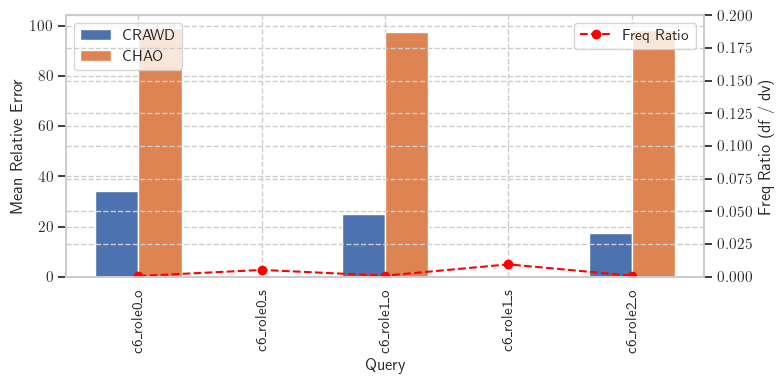

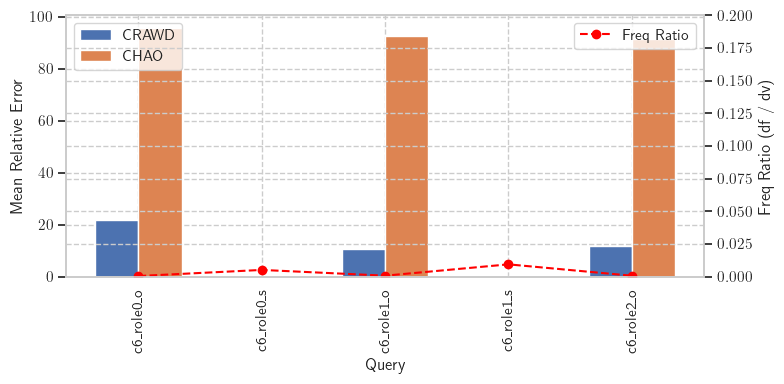

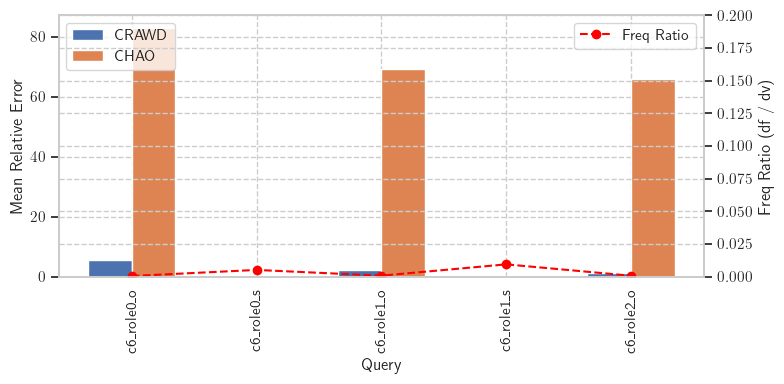

In [ ]:
def calculate_freq_ratio(df, gt_df):
    df = df.merge(gt_df, on='query', suffixes=('', '_gt'))
    df['absolute_error'] = abs(df['cd'] - df['dv'])
    df['relative_error'] = abs(df['cd'] - df['dv']) / df['dv'] * 100
    df['freq_ratio'] = df['df'] / df['dv']
    return df

def plot_freq_ratio(config,crawd,chao,gt):

  # Calculer les erreurs pour chaque estimation
  crawd_fr = calculate_freq_ratio(crawd, gt)
  chao_fr = calculate_freq_ratio(chao, gt)

  # Filtrer les données pour la configuration 9
  crawd_config = crawd_fr[crawd_fr['Config'] == config]
  chao_config = chao_fr[chao_fr['Config'] == config]

  # Calculer la moyenne des erreurs absolues et du ratio pour chaque requête
  crawd_mean_errors = crawd_config.groupby('query')[['absolute_error', 'relative_error', 'freq_ratio']].mean().reset_index()
  chao_mean_errors = chao_config.groupby('query')[['absolute_error', 'relative_error', 'freq_ratio']].mean().reset_index()

  # Comparer les erreurs relatives pour la configuration 6
  comparison_relative_error_config = pd.merge(crawd_mean_errors, chao_mean_errors, on='query', suffixes=('_crawd', '_chao'))

  # Visualiser les résultats en utilisant un graphique à barres
  fig, ax1 = plt.subplots(figsize=(8, 4))

  # Largeur des barres
  bar_width = 0.35

  # Positions des barres sur l'axe x
  index = range(len(comparison_relative_error_config))
  bar1 = comparison_relative_error_config['relative_error_crawd']
  bar2 = comparison_relative_error_config['relative_error_chao']

  # Création des barres
  rects1 = ax1.bar([i - bar_width/2 for i in index], bar1, bar_width, label='CRAWD')
  rects2 = ax1.bar([i + bar_width/2 for i in index], bar2, bar_width, label='CHAO')


  # Graphique pour l'erreur absolue moyenne
  #rects1 = ax1.bar([i - bar_width/2 for i in index], crawd_mean_errors['relative_error'], bar_width, label='Relative Error')

  # Ajouter des labels et titre pour l'axe primaire
  ax1.set_xlabel('Query')
  ax1.set_ylabel('Mean Relative Error')
  #ax1.set_title(f'Mean Relative Error and Freq Ratio for Configuration {config_labels[config]} by Query')
  ax1.set_xticks(index)

  ax1.set_xticklabels(crawd_mean_errors['query'], rotation=90)
  #ax1.set_yscale('log')  # Définir l'échelle logarithmique pour l'axe des y
  ax1.legend(loc='upper left')

  # Création du deuxième axe y pour le ratio des échantillons
  ax2 = ax1.twinx()
  rects2 = ax2.plot(index, crawd_mean_errors['freq_ratio'], label='Freq Ratio', color='red', marker='o', linestyle='--')
  ax2.set_ylim(0,0.2)
  # Ajouter des labels pour l'axe secondaire
  ax2.set_ylabel('Freq Ratio (df / dv)')
  #ax2.set_yscale('log')  # Définir l'échelle logarithmique pour l'axe des y
  ax2.legend(loc='upper right')

  # Afficher le graphique
  plt.tight_layout()
  plt.grid(True, which="both", ls="--")
  plt.show()

## le code est bon
## bien s'assurer du contenu de crawd_watdiv/Chao_watdiv...

plot_freq_ratio(7,crawd_watdiv,chao_watdiv,gt)
plot_freq_ratio(8,crawd_watdiv,chao_watdiv,gt)
plot_freq_ratio(9,crawd_watdiv,chao_watdiv,gt)

In [ ]:
crawd_config = crawd_watdiv[crawd_watdiv['Config'] == 9]
chao_config = chao_watdiv[chao_watdiv['Config'] == 9]# Calculate mean error, then merge and ADD SORTING
crawd_mean_error = crawd_config.groupby('query')['error'].mean().reset_index()
chao_mean_error = chao_config.groupby('query')['error'].mean().reset_index()
comparison_config = pd.merge(crawd_mean_error, chao_mean_error, on='query', suffixes=('_crawd', '_chao'))

comparison_config =comparison_config.merge(crawd_watdiv[['query','nbtp']], on='query', how='left')
comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
comparison_config = comparison_config.groupby('query').mean().reset_index()
comparison_config.sort_values(by='nbtp', inplace=True)
comparison_config

,query,error_crawd,error_chao,nbtp
0,c6_role0_o,21832.380250,334104.449336,2.0
1,c6_role0_s,0.000000,98.364269,2.0
2,c6_role1_o,4646.129780,142091.551937,2.0
3,c6_role1_s,0.000000,79.763646,2.0
4,c6_role2_o,2061.730807,116398.828640,2.0
45,q_7029_v0,6.217656,5.339019,3.0
32,q_4392_v0,6.217656,5.339019,3.0
35,q_4957_v0,6.217656,5.339019,3.0
6,q_10892_v0,6.217656,5.339019,3.0
26,q_3872_v0,6.217656,5.339019,3.0


### Plot for absolute error with order in number of triples

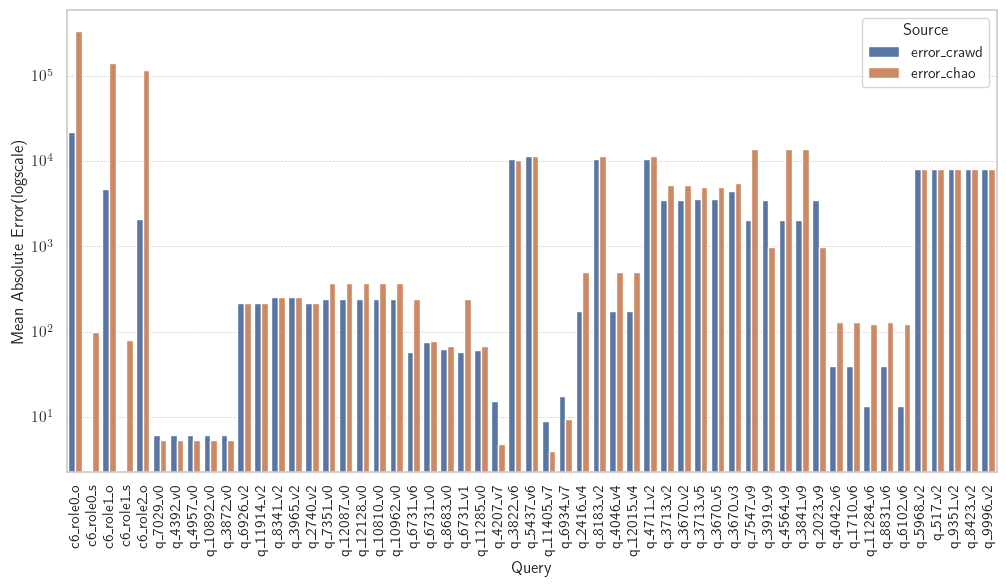

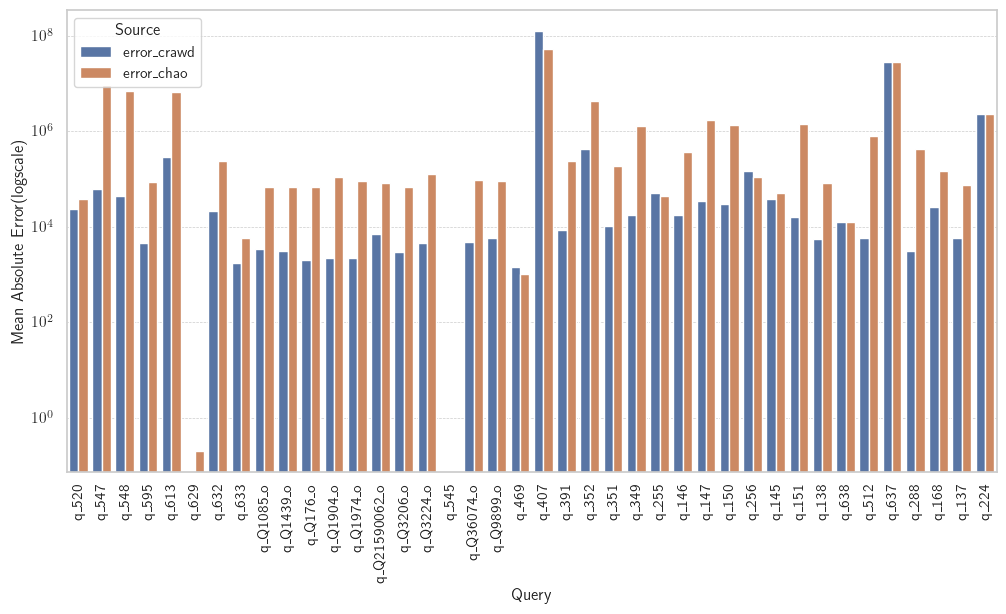

In [ ]:
def plot_absolute_error_order_nbtp(config, crawd, chao):
    crawd_config = crawd[crawd['Config'] == config]
    chao_config = chao[chao['Config'] == config]
    crawd_mean_error = crawd_config.groupby('query')['error'].mean().reset_index()
    chao_mean_error = chao_config.groupby('query')['error'].mean().reset_index()
    comparison_config = pd.merge(crawd_mean_error, chao_mean_error, on='query', suffixes=('_crawd', '_chao'))

    comparison_config = comparison_config.merge(crawd[['query','nbtp']], on='query', how='left')
    comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
    comparison_config = comparison_config.groupby('query').mean().reset_index()
    comparison_config.sort_values(by='nbtp', inplace=True)

    # Create a melted DataFrame for seaborn
    melted_comparison = comparison_config.melt(id_vars=['query', 'nbtp'], value_vars=['error_crawd', 'error_chao'],
                                               var_name='Source', value_name='Mean Absolute Error')

    # Create a seaborn barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='query', y='Mean Absolute Error', hue='Source', data=melted_comparison)

    plt.xlabel('Query')
    plt.ylabel('Mean Absolute Error(logscale)')
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.legend(title='Source')
    plt.grid(axis='y',  linestyle='--', linewidth=0.5)
    plt.show()
plot_absolute_error_order_nbtp(9,crawd_watdiv,chao_watdiv)
plot_absolute_error_order_nbtp(9,crawd_wdbench,chao_wdbench)

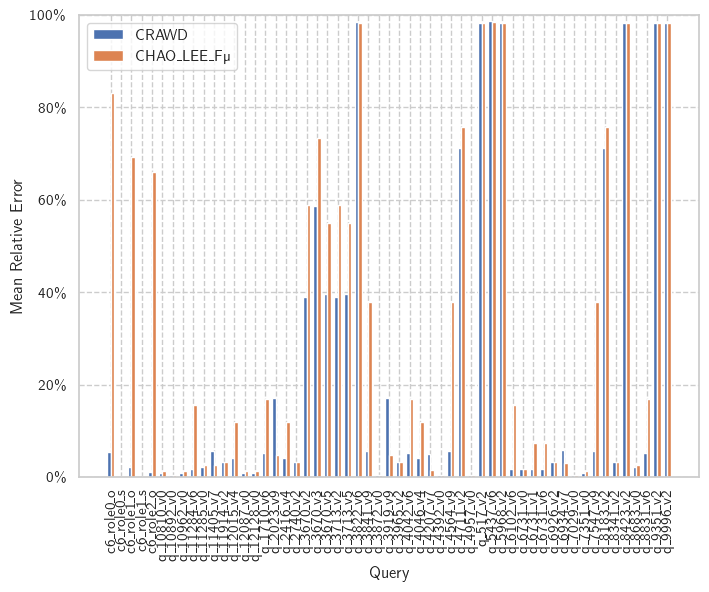

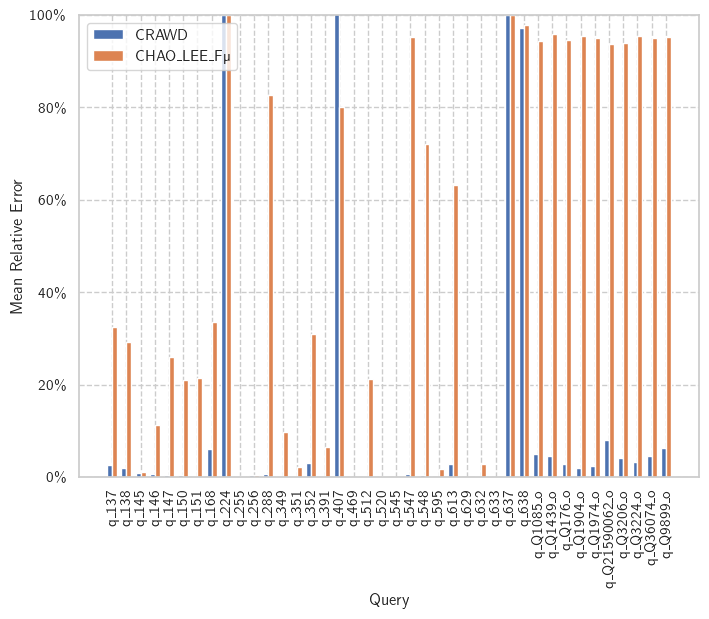

In [ ]:

def plot_relative_error(config,crawd,chao):
  crawd_config = crawd[crawd['Config'] == config]
  chao_config = chao[chao['Config'] == config]

  # Calculer la moyenne des erreurs relatives pour chaque requête
  crawd_mean_relative_error = crawd_config.groupby('query')['relative_error'].mean().reset_index()
  chao_mean_relative_error = chao_config.groupby('query')['relative_error'].mean().reset_index()

  # Comparer les erreurs relatives pour la configuration 6
  comparison_relative_error_config = pd.merge(crawd_mean_relative_error, chao_mean_relative_error, on='query', suffixes=('_crawd', '_chao'))

  # Visualiser les résultats en utilisant un graphique à barres
  fig, ax = plt.subplots(figsize=(8, 6))

  # Largeur des barres
  bar_width = 0.35

  # Positions des barres sur l'axe x
  index = range(len(comparison_relative_error_config))
  bar1 = comparison_relative_error_config['relative_error_crawd']
  bar2 = comparison_relative_error_config['relative_error_chao']

  # Création des barres
  rects1 = ax.bar([i - bar_width/2 for i in index], bar1, bar_width, label='CRAWD')
  rects2 = ax.bar([i + bar_width/2 for i in index], bar2, bar_width, label='CHAO_LEE_Fµ')

  # Ajouter des labels, titre et légende
  ax.set_xlabel('Query')
  ax.set_ylabel('Mean Relative Error')
  #ax.set_title(f'Comparison of Mean Relative Error for Configuration {config_labels[config]} by Query')
  ax.set_xticks(index)
  ax.set_xticklabels(comparison_relative_error_config['query'], rotation=90)
  ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
  ax.legend()

  plt.ylim(0,100)
  plt.grid(axis='y',which='minor', linestyle='--', linewidth=0.5)
  plt.show()

plot_relative_error(9,crawd_watdiv,chao_watdiv)
plot_relative_error(9,crawd_wdbench,chao_wdbench)



In [ ]:

def compute_var_across_configs(crawd, config1, config2, config3):
    mean_crawd_configs = {}
    configs = [config1, config2, config3]

    for config in configs:
        # Compute mean of runs for each query and config
        df = crawd[crawd['Config'] == config]
        mean_df = df.groupby('query')['cd'].mean().reset_index()
        #print(mean_df)
        mean_df = mean_df.rename(columns={'cd': f'cd_{config}'})
        mean_crawd_configs[config] = mean_df

    merged_df = mean_crawd_configs[config1]
    for config in configs[1:]:
        merged_df = merged_df.merge(mean_crawd_configs[config], on='query')

    variance_columns = [f'cd_{config}' for config in configs]
    merged_df['Variance'] = merged_df[variance_columns].var(axis=1)
    merged_df['STD'] = merged_df[variance_columns].std(axis=1)

    print(merged_df[['query', 'Variance','STD']])

compute_var_across_configs(crawd_watdiv, 1, 5, 9)


         query      Variance           STD
0   c6_role0_o  8.439717e+07   9186.793034
1   c6_role0_s  0.000000e+00      0.000000
2   c6_role1_o  8.086309e+08  28436.436525
3   c6_role1_s  0.000000e+00      0.000000
4   c6_role2_o  1.102112e+09  33198.074158
5   q_10810_v0  2.269356e+04    150.643826
6   q_10892_v0  6.819602e+00      2.611437
7   q_10962_v0  2.269356e+04    150.643826
8   q_11284_v6  9.239809e+04    303.970550
9   q_11285_v0  1.483109e+03     38.511150
10  q_11405_v7  2.246585e+00      1.498861
11  q_11914_v2  4.174738e+06   2043.217537
12  q_12015_v4  3.652666e+06   1911.194793
13  q_12087_v0  2.269356e+04    150.643826
14  q_12128_v0  2.269356e+04    150.643826
15   q_1710_v6  1.121213e+05    334.845140
16   q_2023_v9  6.616503e+07   8134.189197
17   q_2416_v4  3.652666e+06   1911.194793
18   q_2740_v2  4.174738e+06   2043.217537
19   q_3670_v2  8.106673e+06   2847.221949
20   q_3670_v3  2.712112e+06   1646.849057
21   q_3670_v5  7.918560e+06   2813.993589
22   q_3713

In [ ]:
def compute_cv_across_configs(crawd, config1, config2, config3):
    mean_crawd_configs = {}
    configs = [config1, config2, config3]

    for config in configs:
        # Compute mean and standard deviation of runs for each query and config
        df = crawd[crawd['Config'] == config]
        agg_df = df.groupby('query')['cd'].agg(['mean', 'std']).reset_index()
        agg_df.columns = ['query', f'cd_mean_{config}', f'cd_std_{config}']
        mean_crawd_configs[config] = agg_df

    # Merge dataframes on query
    merged_df = mean_crawd_configs[config1]
    for config in configs[1:]:
        merged_df = merged_df.merge(mean_crawd_configs[config], on='query')

    # Calculate CV for each query across configurations
    for config in configs:
        merged_df[f'CV_{config}'] = merged_df[f'cd_std_{config}'] / merged_df[f'cd_mean_{config}']

    print(merged_df[['query'] + [f'CV_{config}' for config in configs]])
compute_cv_across_configs(crawd_watdiv, 1, 5, 9)

         query      CV_1      CV_5      CV_9
0   c6_role0_o  0.024988  0.030811  0.069327
1   c6_role0_s  0.000000  0.000000  0.000000
2   c6_role1_o  0.062659  0.041095  0.032223
3   c6_role1_s  0.000000  0.000000  0.000000
4   c6_role2_o  0.039280  0.035377  0.015028
5   q_10810_v0  0.013178  0.012192  0.010318
6   q_10892_v0  0.011021  0.010602  0.005338
7   q_10962_v0  0.013178  0.012192  0.010318
8   q_11284_v6  0.193385  0.192756  0.027154
9   q_11285_v0  0.062954  0.022634  0.030994
10  q_11405_v7  0.199550  0.074743  0.064871
11  q_11914_v2  0.005504  0.000773  0.000116
12  q_12015_v4  0.241077  0.026105  0.050775
13  q_12087_v0  0.013178  0.012192  0.010318
14  q_12128_v0  0.013178  0.012192  0.010318
15   q_1710_v6  0.066209  0.155202  0.058566
16   q_2023_v9  0.340071  0.109104  0.114572
17   q_2416_v4  0.241077  0.026105  0.050775
18   q_2740_v2  0.005504  0.000773  0.000116
19   q_3670_v2  0.316657  0.122177  0.017014
20   q_3670_v3  0.378755  0.149042  0.026867
21   q_367

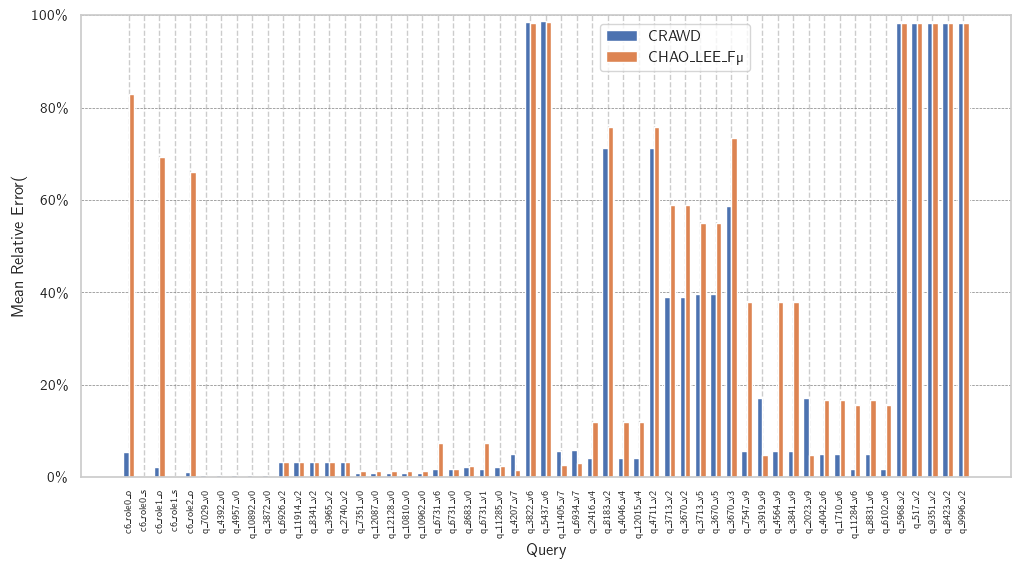

In [ ]:
import numpy as np
def plot_relative_error_order_nbtp(config,crawd,chao):
  crawd_config = crawd[crawd['Config'] == config]
  chao_config = chao[chao['Config'] == config]
  crawd_mean_relative_error = crawd_config.groupby('query')['relative_error'].mean().reset_index()
  chao_mean_relative_error = chao_config.groupby('query')['relative_error'].mean().reset_index()
  comparison_config = pd.merge(crawd_mean_relative_error, chao_mean_relative_error, on='query', suffixes=('_crawd', '_chao'))

  comparison_config =comparison_config.merge(crawd[['query','nbtp']], on='query', how='left')
  comparison_config['nbtp'] = pd.to_numeric(comparison_config['nbtp'])
  comparison_config = comparison_config.groupby('query').mean().reset_index()
  comparison_config.sort_values(by='nbtp', inplace=True)
  fig, ax = plt.subplots(figsize=(12, 6))

  # Largeur des barres
  bar_width = 0.35
  index = np.arange(len(comparison_config))
  bar1 = comparison_config['relative_error_crawd']
  bar2 = comparison_config['relative_error_chao']

  rects1 = ax.bar([i - bar_width/2 for i in index], bar1, bar_width, label='CRAWD')
  rects2 = ax.bar([i + bar_width/2 for i in index], bar2, bar_width, label='CHAO_LEE_Fµ')

  # Ajouter des labels, titre et légende
  ax.set_xlabel('Query')
  ax.set_ylabel('Mean Relative Error(%)')
  #ax.set_title(f'Comparison of Mean Relative Error for Configuration {config_labels[config]} by Query')
  ax.set_xticks(index )
  ax.set_xticklabels(comparison_config['query'], rotation=90,fontsize = 7)
  ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_percent_y))
  ax.legend(loc='center left', bbox_to_anchor=(0.55, 0.93))
  plt.ylim(0,100)
  plt.grid(axis='y', color='gray', linestyle='dashed', linewidth=0.5)
  #plt.grid(axis='x')
  plt.show()

plot_relative_error_order_nbtp(9,crawd_watdiv,chao_watdiv)
#plot_relative_error_order_nbtp(9,crawd_wdbench,chao_wdbench)

